## Accessing datasets for better understanding and performing EDA

In [23]:
import sys
import os

# Add project root and src folder to path
sys.path.append(os.path.abspath(".."))       # project root
sys.path.append(os.path.abspath("../src"))   # src folder


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Data/MachineLearningRating_v3.txt", sep="|")
df.head(3)


C:\Users\hp\AppData\Local\Temp\ipykernel_11596\3168408351.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/MachineLearningRating_v3.txt", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.sample(3)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
603469,54631,5037,2015-07-01 00:00:00,False,,Individual,Mr,English,NaN,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.373158,0.0
50169,199603,8203,2015-06-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,...,No excess,Basic Excess Waiver,Basic Excess Waiver,Basic Excess Waiver,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,78.947368,0.0
249698,90416,7296,2015-01-01 00:00:00,False,,Individual,Mr,English,Capitec Bank,Savings account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0


## Checking null values in each column 
    - Data quality assesment per column

In [6]:
import pandas as pd
import numpy as np
missing_summary = pd.DataFrame({
    "null_count": df.isna().sum(),
    "null_percent": (df.isna().sum() / len(df)) * 100
})

print(missing_summary)




                          null_count  null_percent
UnderwrittenCoverID                0      0.000000
PolicyID                           0      0.000000
TransactionMonth                   0      0.000000
IsVATRegistered                    0      0.000000
Citizenship                        0      0.000000
LegalType                          0      0.000000
Title                              0      0.000000
Language                           0      0.000000
Bank                          145961     14.594670
AccountType                    40232      4.022806
MaritalStatus                   8259      0.825819
Gender                          9536      0.953507
Country                            0      0.000000
Province                           0      0.000000
PostalCode                         0      0.000000
MainCrestaZone                     0      0.000000
SubCrestaZone                      0      0.000000
ItemType                           0      0.000000
mmcode                         

### Checking zero values 

In [7]:
import pandas as pd
import numpy as np
zero_summary = pd.DataFrame({
    "zero_count": df.eq(0.00).sum(),
    "zero_percent": (df.eq(0.00).sum() / len(df)) * 100
   
})

print(zero_summary)


                          zero_count  zero_percent
UnderwrittenCoverID                0      0.000000
PolicyID                           0      0.000000
TransactionMonth                   0      0.000000
IsVATRegistered               995075     99.497749
Citizenship                        0      0.000000
LegalType                          0      0.000000
Title                              0      0.000000
Language                           0      0.000000
Bank                               0      0.000000
AccountType                        0      0.000000
MaritalStatus                      0      0.000000
Gender                             0      0.000000
Country                            0      0.000000
Province                           0      0.000000
PostalCode                         0      0.000000
MainCrestaZone                     0      0.000000
SubCrestaZone                      0      0.000000
ItemType                           0      0.000000
mmcode                         

## Organizing Columns by Category

In [8]:
columns_policy = [
    "UnderwrittenCoverID", "PolicyID", "TransactionMonth"
]

columns_client = [
    "IsVATRegistered","Citizenship","LegalType","Title","Language",
    "Bank","AccountType","MaritalStatus","Gender"
]

columns_location = [
    "Country","Province","PostalCode","MainCrestaZone","SubCrestaZone"
]

columns_vehicle = [
    "ItemType","mmcode","VehicleType","RegistrationYear","make","Model",
    "Cylinders","cubiccapacity","kilowatts","bodytype","NumberOfDoors",
    "VehicleIntroDate","CustomValueEstimate","AlarmImmobiliser",
    "TrackingDevice","CapitalOutstanding","NewVehicle", "WrittenOff",
    "Rebuilt","Converted","CrossBorder","NumberOfVehiclesInFleet"
]

columns_plan = [
    "SumInsured","TermFrequency","CalculatedPremiumPerTerm",
    "ExcessSelected","CoverCategory","CoverType","CoverGroup","Section",
    "Product","StatutoryClass","StatutoryRiskType"
]

columns_payment = [
    "TotalPremium","TotalClaims"
]


## Understanding data by column

### Columns about the insurance policy

In [9]:
import pandas as pd
import numpy as np
df[columns_policy].describe()
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])
df["year"] = df["TransactionMonth"].dt.year
df["month"] = df["TransactionMonth"].dt.month

df["year"].value_counts()




year
2015    756734
2014    240628
2013      2736
Name: count, dtype: int64

### Identifying Data types

The numeric columns are: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
The categorical columns are: ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
The boolen columns are: ['IsVATRegistered']
The daytime columns are: ['TransactionMonth']


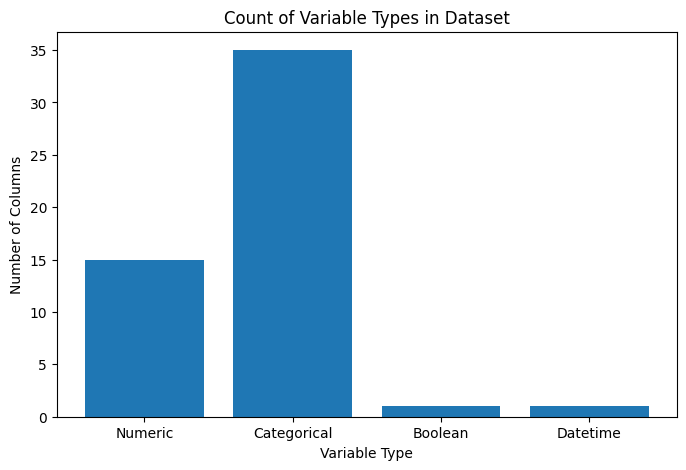

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Detect column types
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

# Create a dictionary of counts
type_counts = {
    "Numeric": len(numeric_cols),
    "Categorical": len(categorical_cols),
    "Boolean": len(bool_cols),
    "Datetime": len(datetime_cols)
}

print(f"The numeric columns are:", numeric_cols)
print(f"The categorical columns are:", categorical_cols)
print(f"The boolen columns are:", bool_cols)
print(f"The daytime columns are:", datetime_cols)

# Plot bar graph
plt.figure(figsize=(8,5))
plt.bar(type_counts.keys(), type_counts.values())
plt.title("Count of Variable Types in Dataset")
plt.xlabel("Variable Type")
plt.ylabel("Number of Columns")
plt.show()


### Calculating the variablity of numeric counts

In [11]:
import pandas as pd

num_cols = df.select_dtypes(include=['int64','float64']).columns

variability_summary = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "StdDev": df[num_cols].std(),
    "Variance": df[num_cols].var(),
    "Range": df[num_cols].max() - df[num_cols].min(),
    "IQR": df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25),
    "CV": df[num_cols].std() / df[num_cols].mean(),
    "Skewness": df[num_cols].skew(),
    "Kurtosis": df[num_cols].kurt()
})

variability_summary


,Mean,StdDev,Variance,Range,IQR,CV,Skewness,Kurtosis
UnderwrittenCoverID,1.048175e+05,6.329371e+04,4.006094e+09,3.011740e+05,84047.000000,0.603847,0.611710,0.028837
PolicyID,7.956682e+03,5.290039e+03,2.798451e+07,2.323200e+04,6577.000000,0.664855,0.737428,0.281970
PostalCode,3.020601e+03,2.649854e+03,7.021728e+06,9.869000e+03,3353.000000,0.877261,0.799472,-0.636058
mmcode,5.487770e+07,1.360381e+07,1.850635e+14,6.102415e+07,1493.000000,0.247893,-2.609235,5.615633
RegistrationYear,2.010225e+03,3.261391e+00,1.063667e+01,2.800000e+01,5.000000,0.001622,-0.794487,0.608084
Cylinders,4.046642e+00,2.940201e-01,8.644783e-02,1.000000e+01,0.000000,0.072658,5.704635,71.285271
cubiccapacity,2.466743e+03,4.428006e+02,1.960724e+05,1.288000e+04,457.000000,0.179508,3.576025,102.289803
kilowatts,9.720792e+01,1.939326e+01,3.760984e+02,3.090000e+02,36.000000,0.199503,0.244719,3.009992
NumberOfDoors,4.019250e+00,4.683144e-01,2.193184e-01,6.000000e+00,0.000000,0.116518,-2.531328,18.833823
CustomValueEstimate,2.255311e+05,5.645157e+05,3.186780e+11,2.653000e+07,145000.000000,2.503050,40.870518,1762.321550


### checking if there are any Dates stored as strings 

In [12]:
import re

potential_date_cols = []

for col in df.columns:
    if df[col].dtype == "object":
        sample = df[col].astype(str).head(20)
        if sample.str.contains(r'\d{4}-\d{2}-\d{2}').any():
            potential_date_cols.append(col)

print("Columns that LOOK like dates:", potential_date_cols)


Columns that LOOK like dates: []


### Casting columns into date format

In [13]:
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'], errors='coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_15900\1165814414.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


### checking the datatypes that are Dates 

In [14]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("\nDatetime Columns:", datetime_cols)


Datetime Columns: ['TransactionMonth', 'RegistrationYear', 'VehicleIntroDate']


## Univariate and Bivariate EDA
 

### Making all financial values numeric 

In [15]:
financial_cols = [
    "TotalClaims", 
    "TotalPremium", 
    "CustomValueEstimate",
    "SumInsured",
    "CapitalOutstanding"
]

for col in financial_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


### Histogram for numerical values 

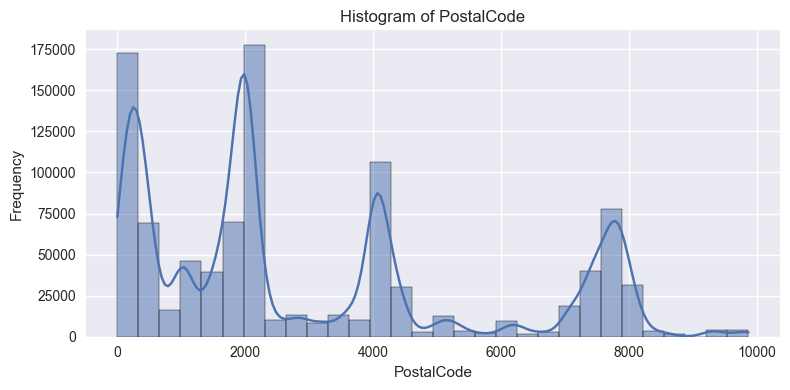

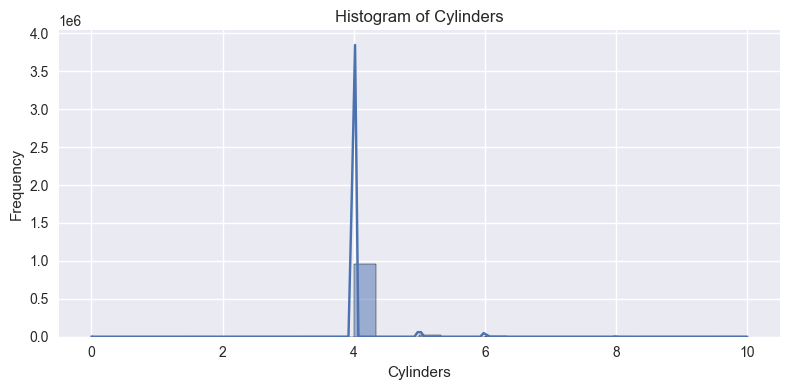

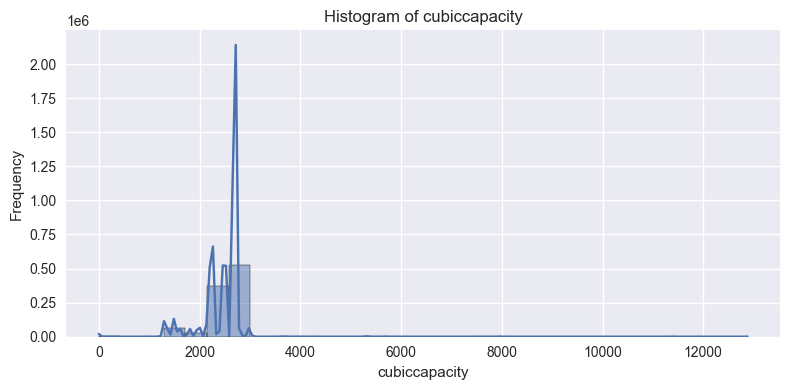

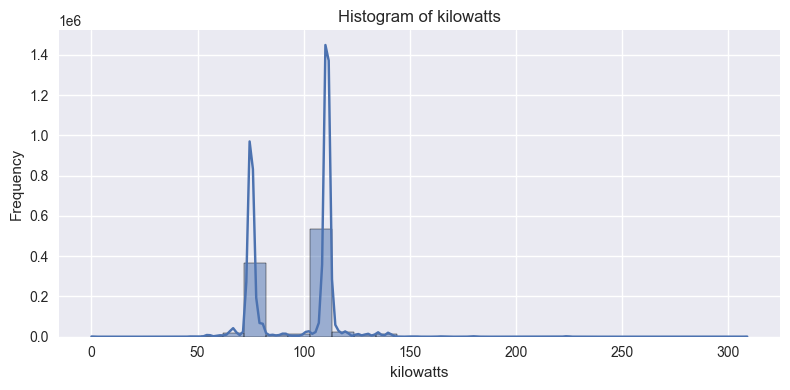

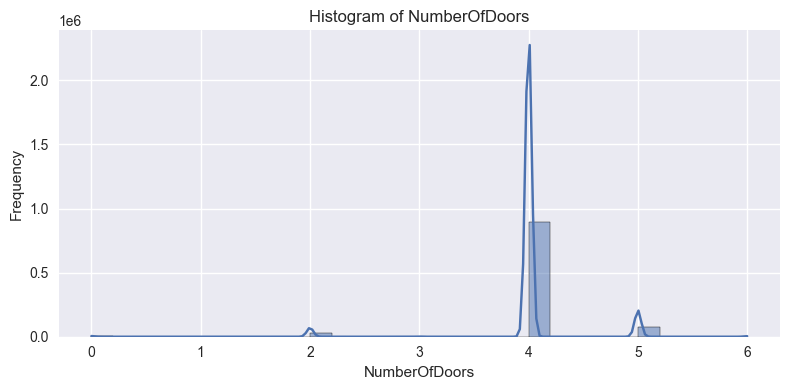

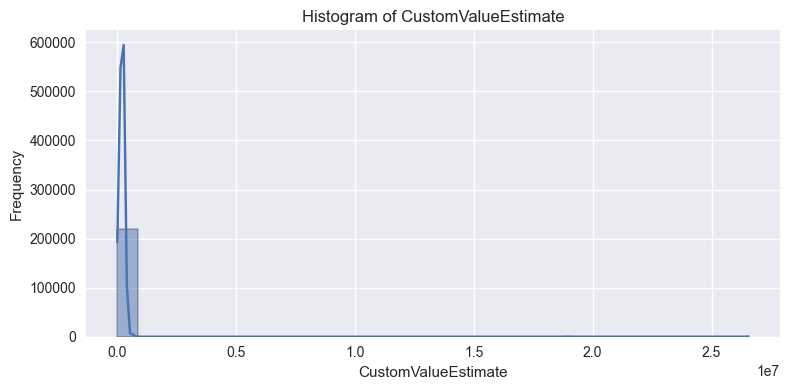

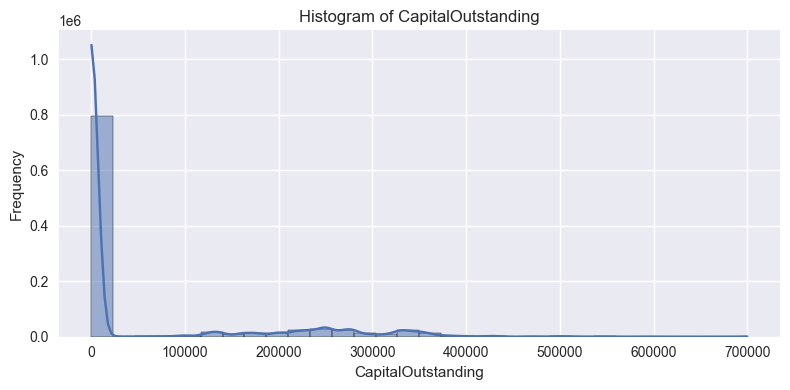

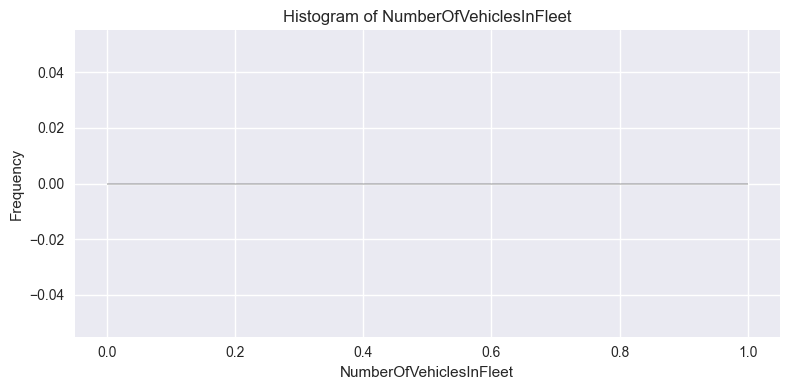

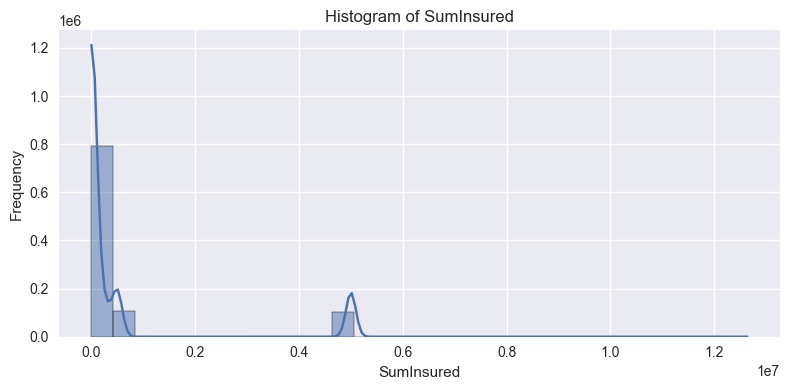

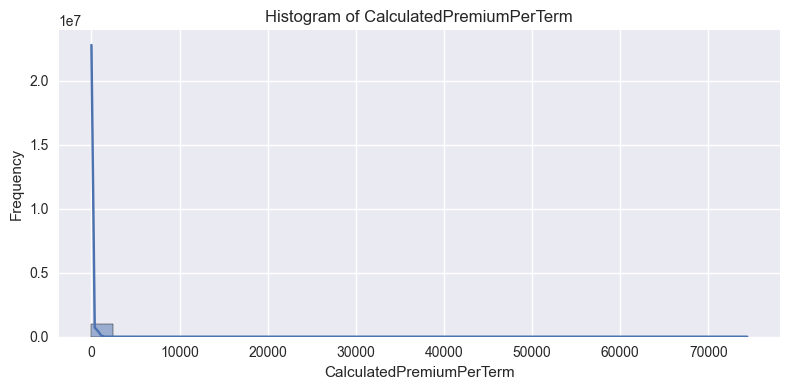

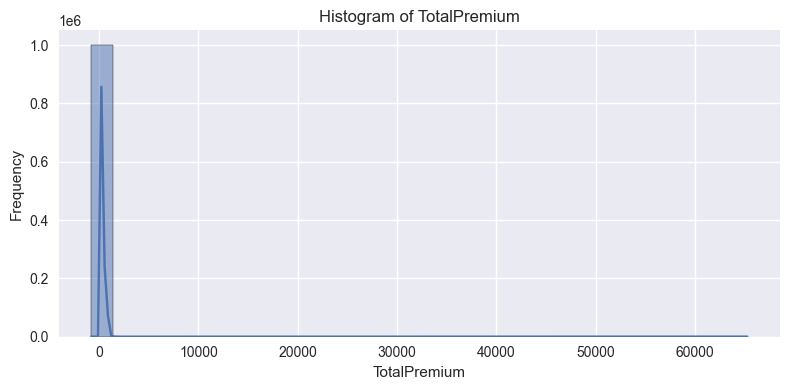

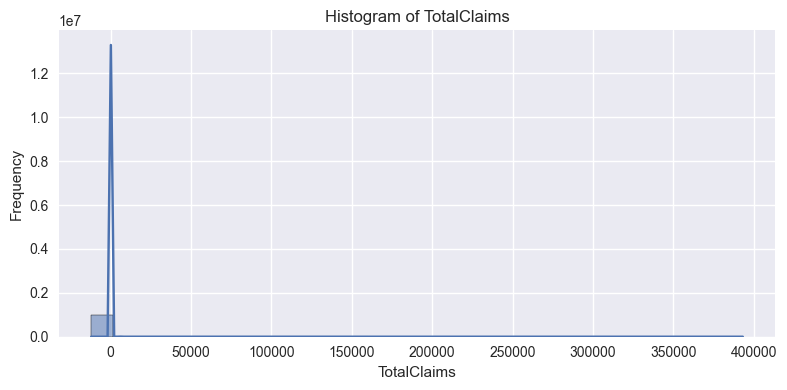

In [16]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

id_columns = [
    "ID", "PolicyID", "CustomerID", "ClaimID", "UnderwrittenCoverID",
    "ItemID", "mmcode" , "postalCode"   # add more if needed
]

numeric_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col not in id_columns
]


for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


### Bar graph for categorical values 

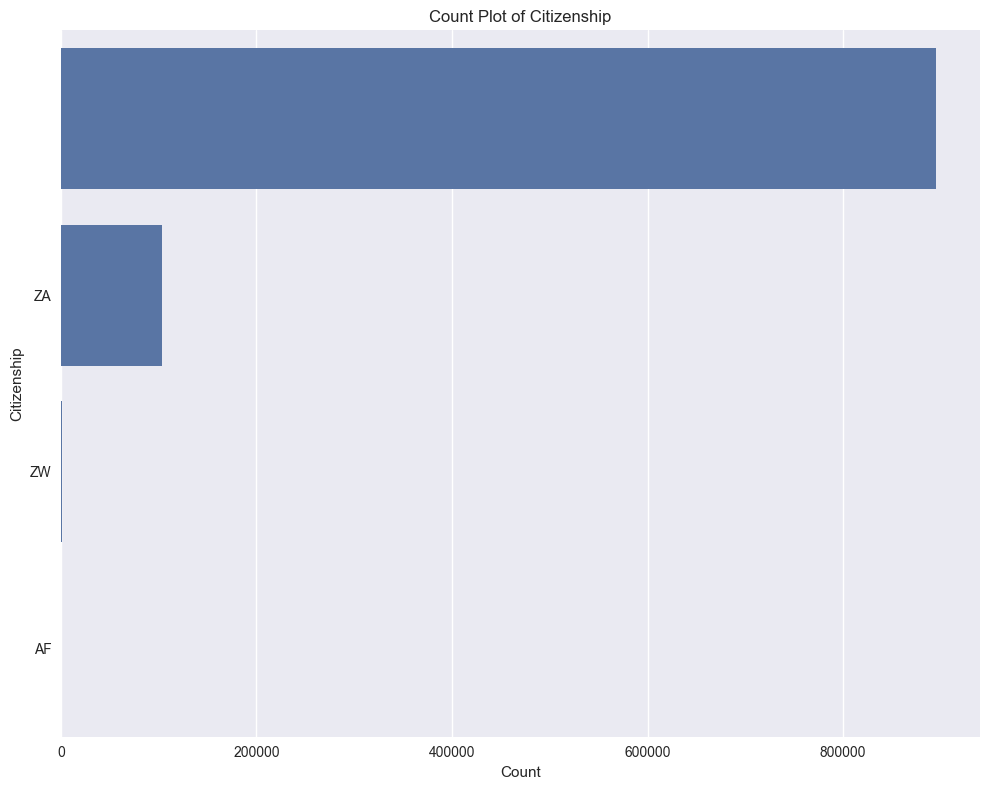

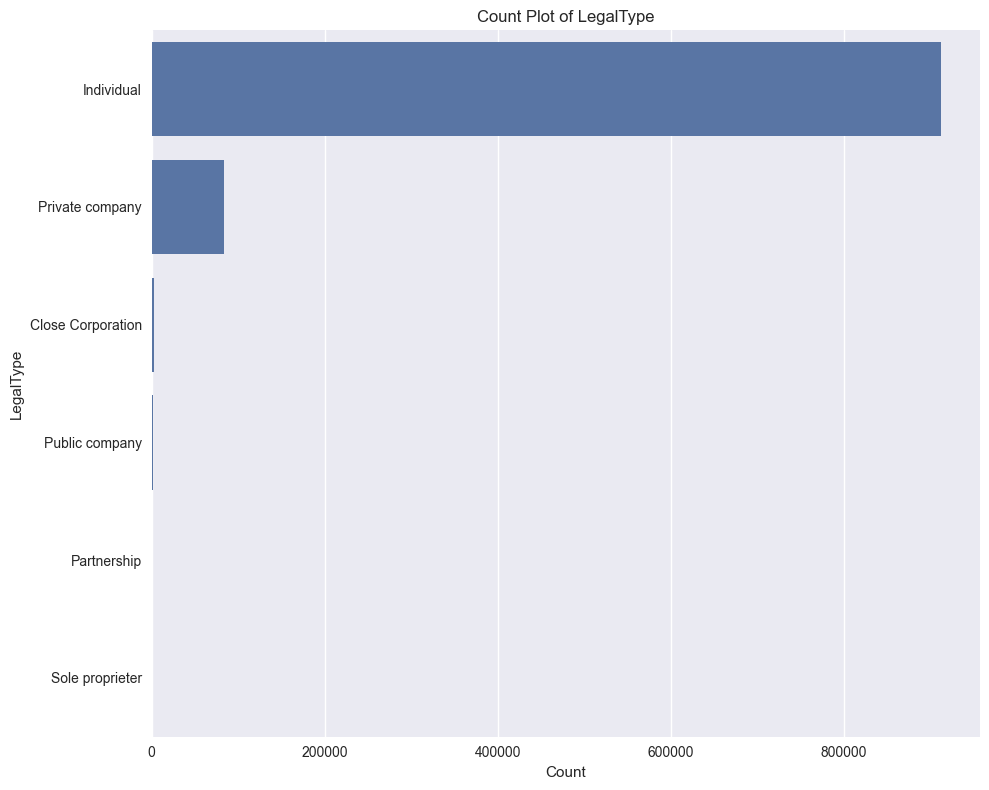

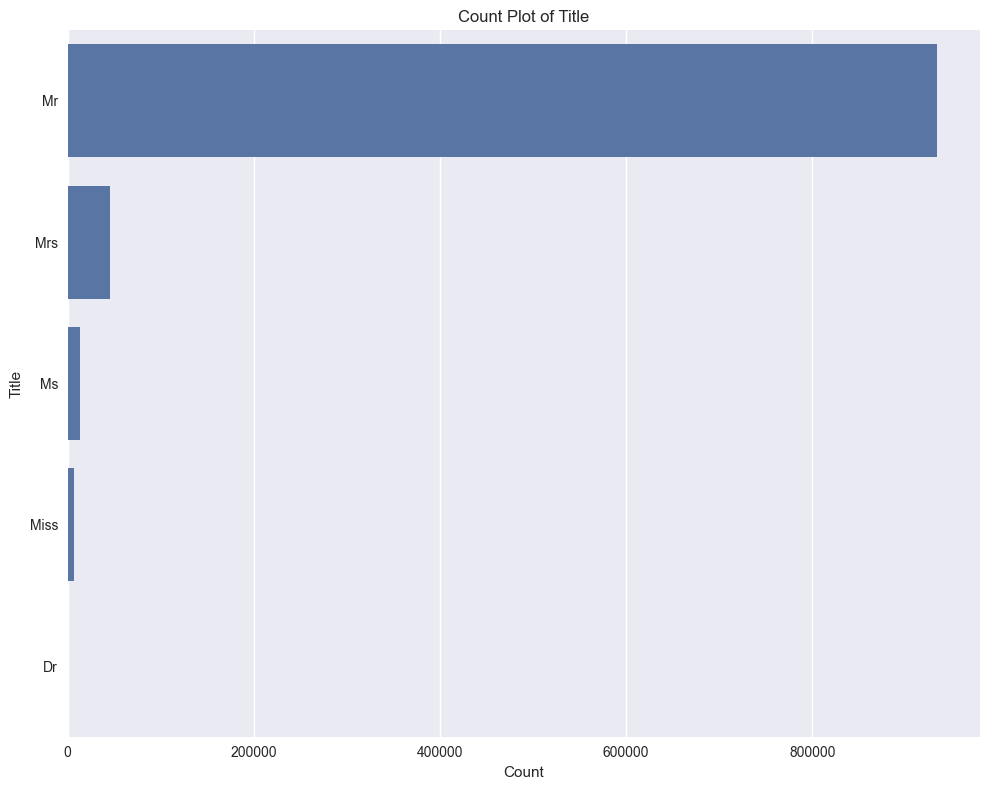

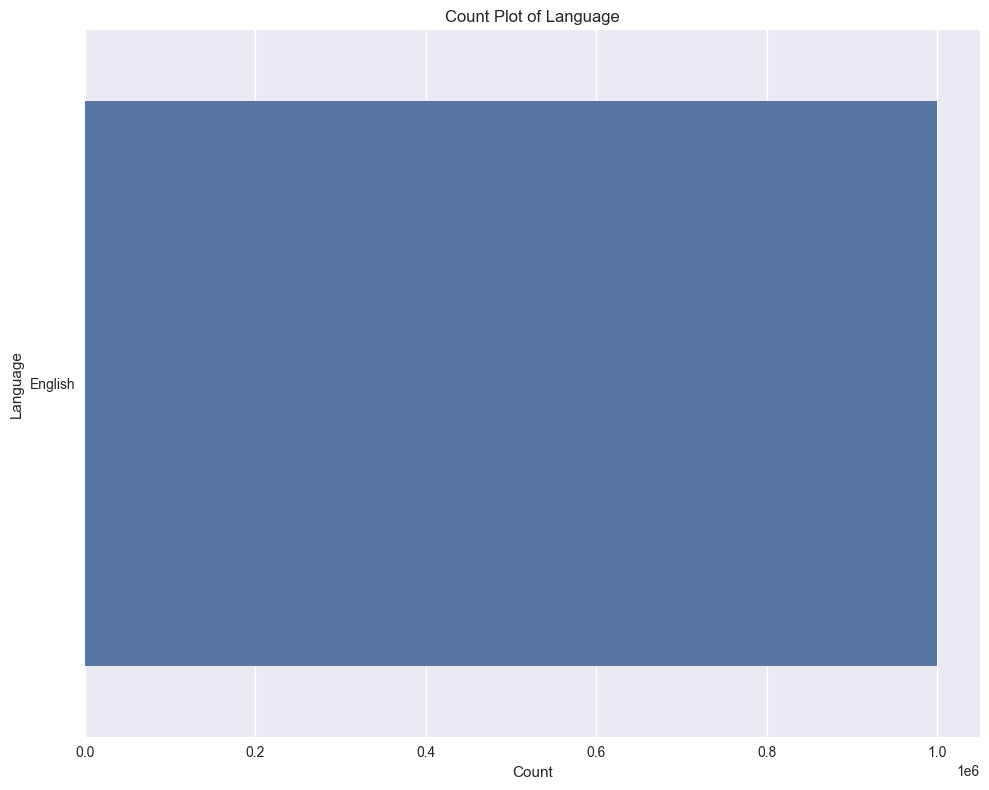

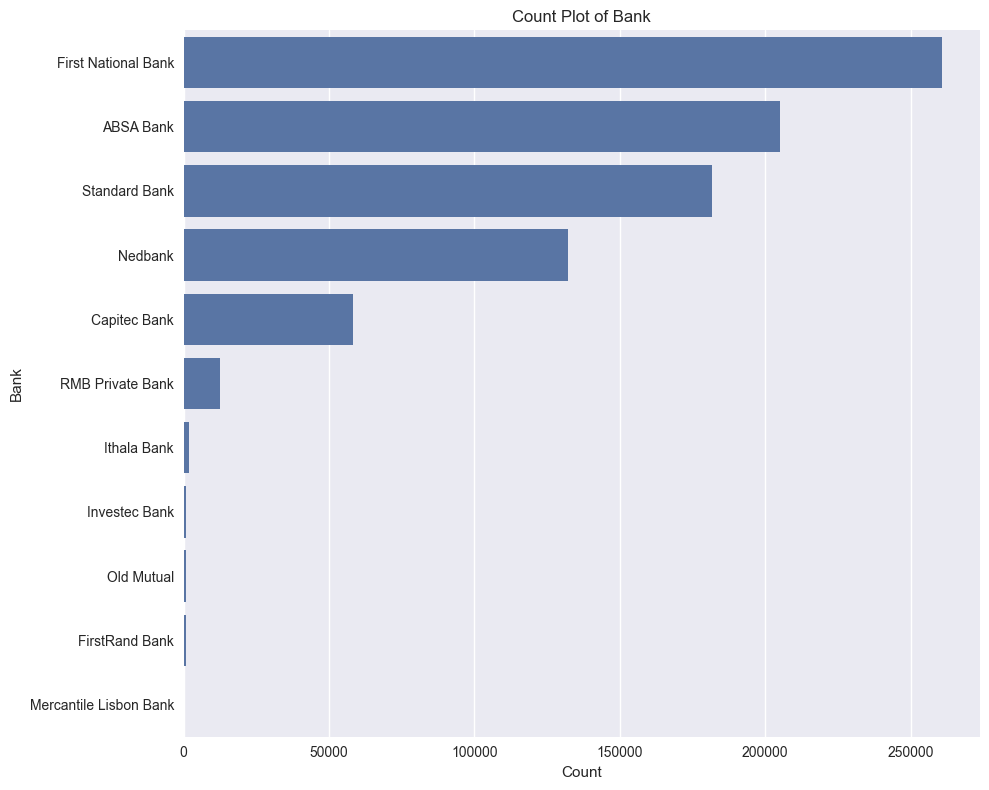

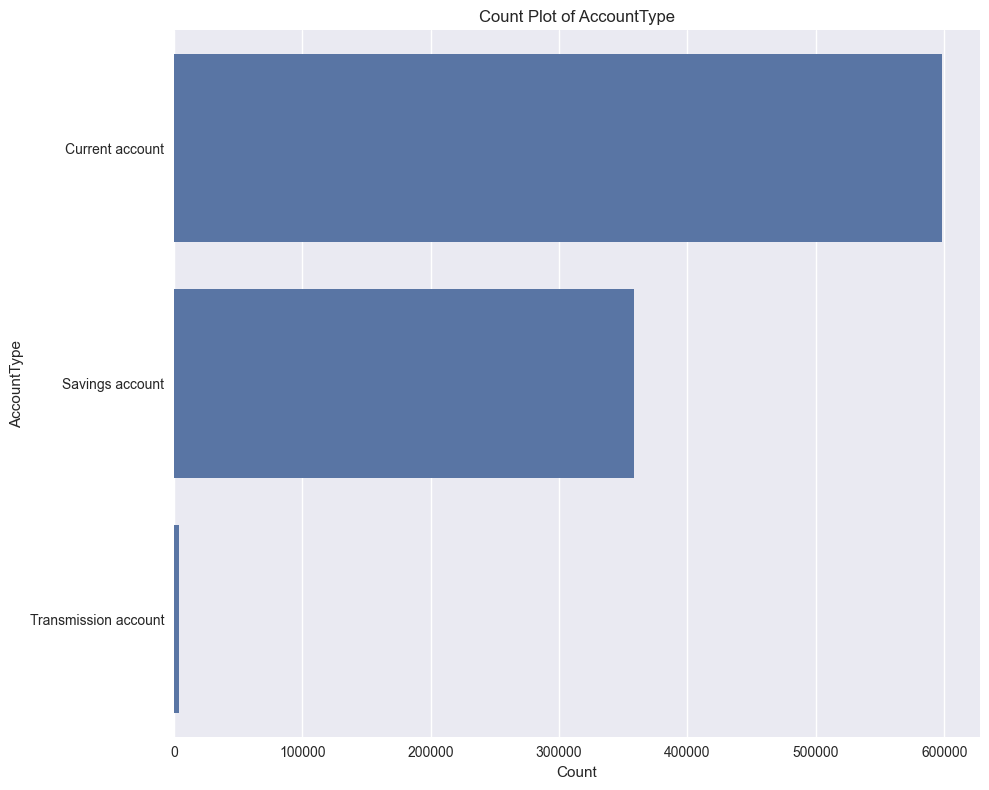

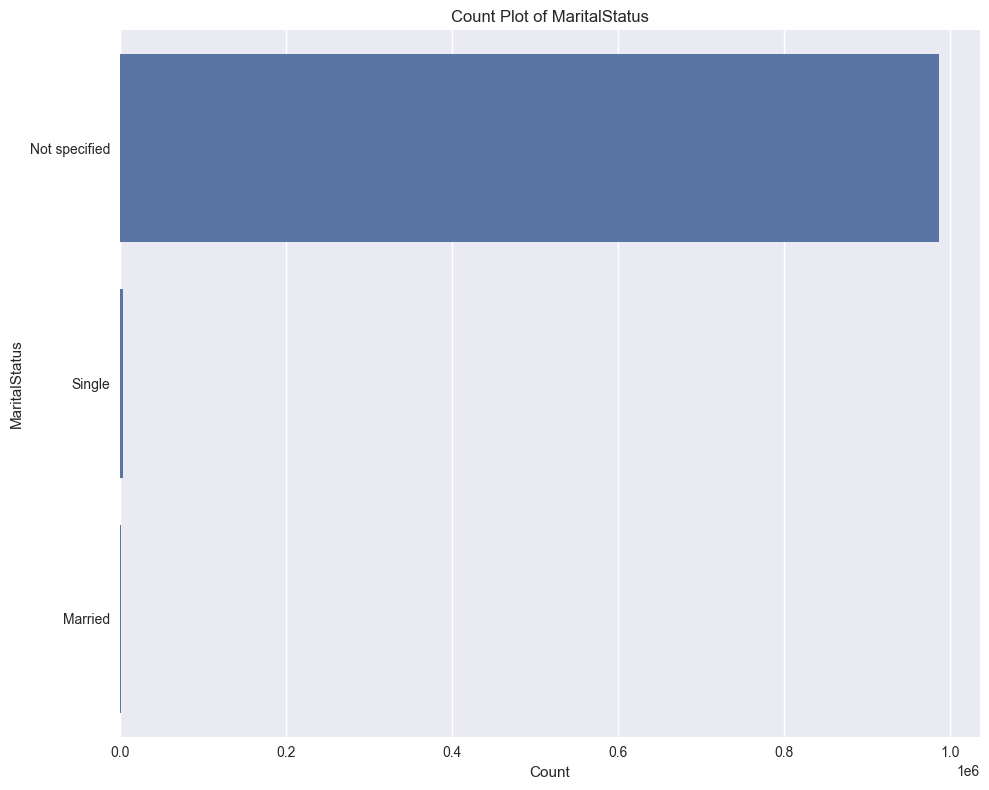

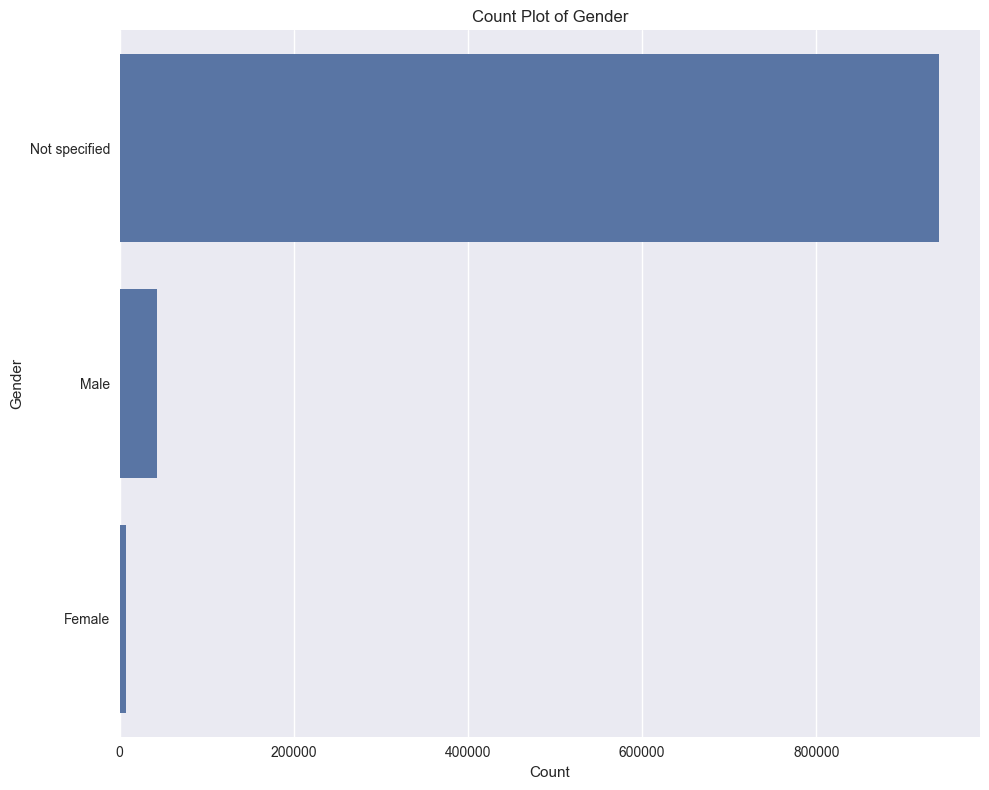

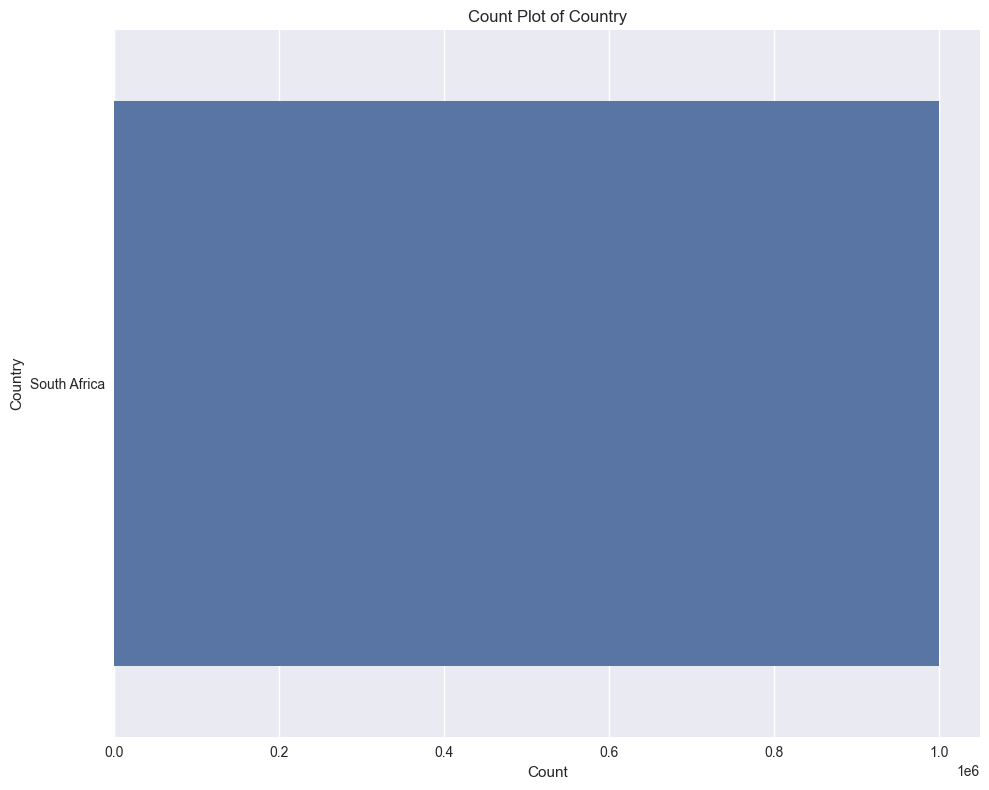

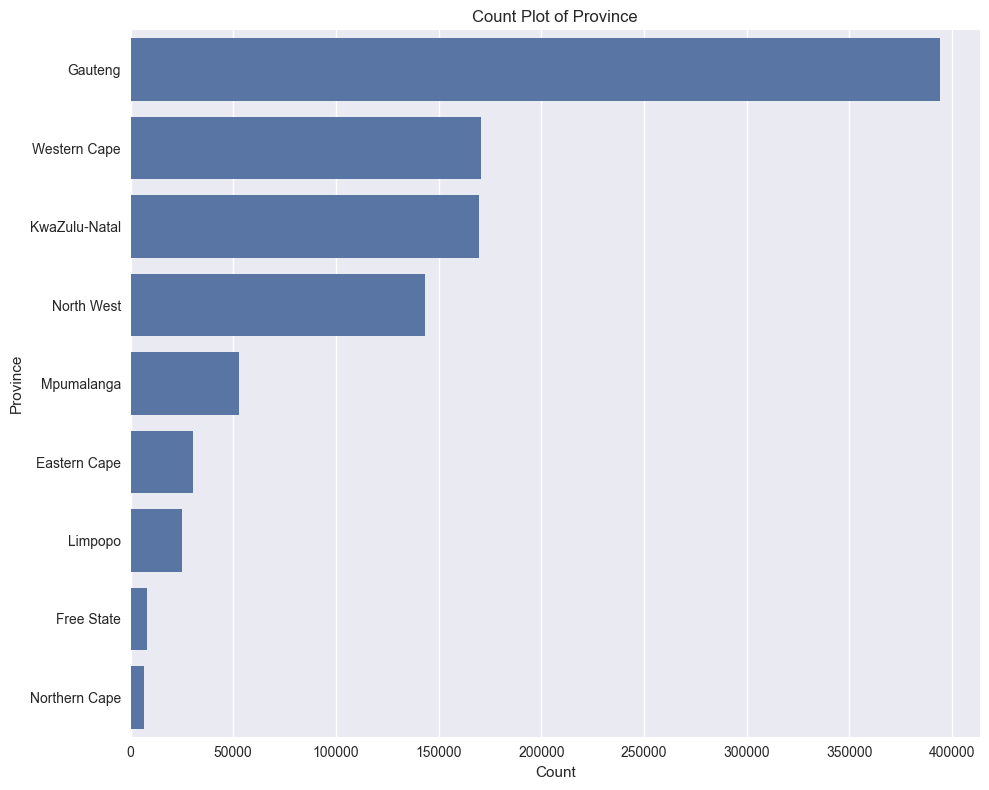

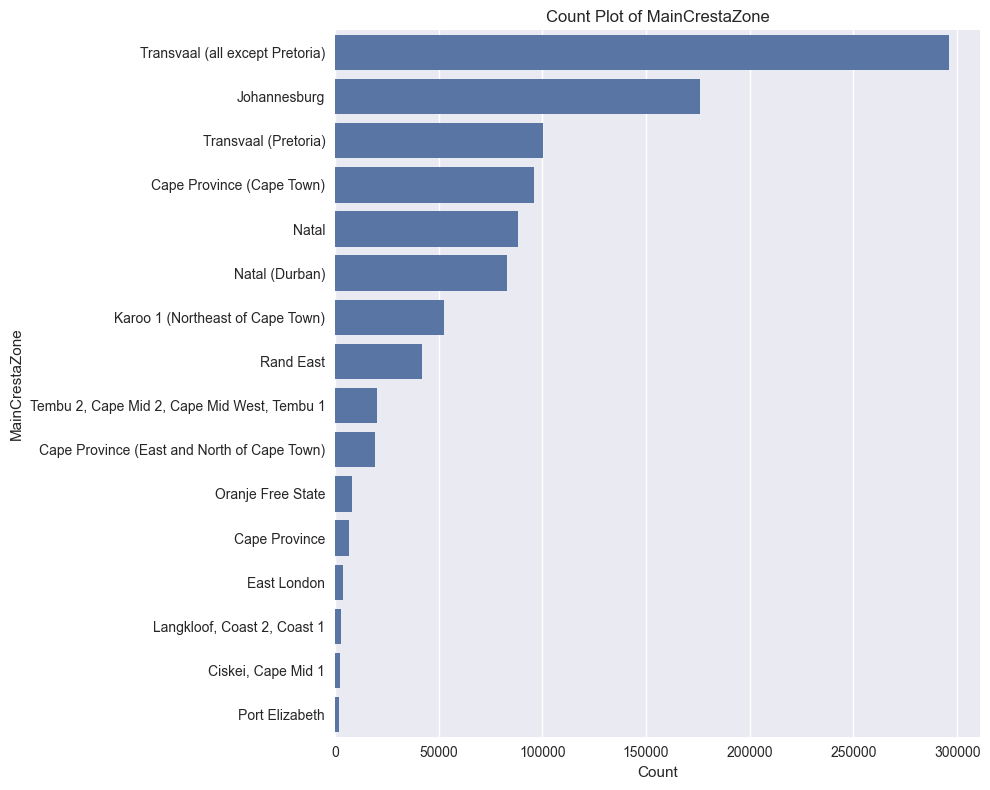

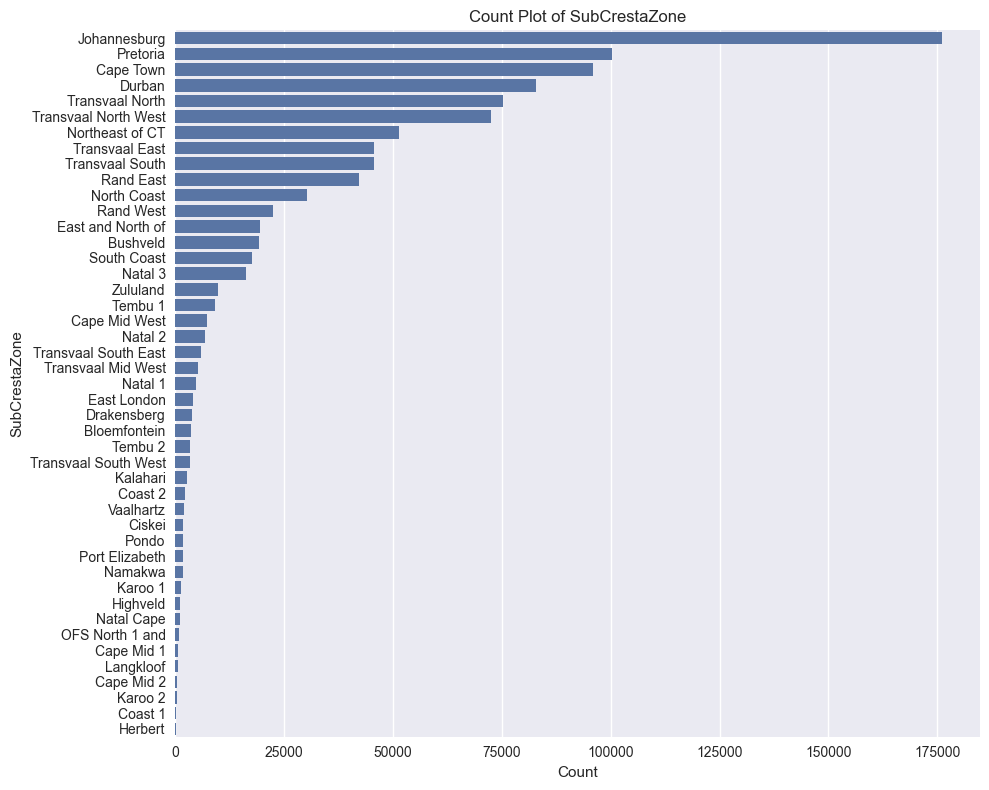

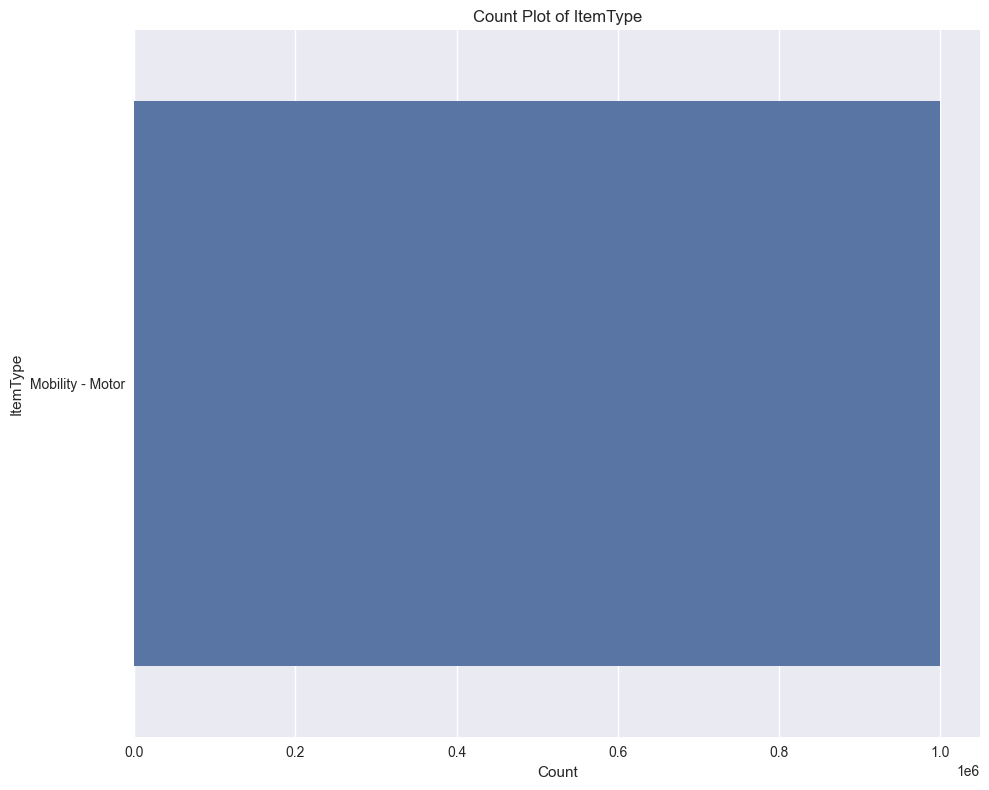

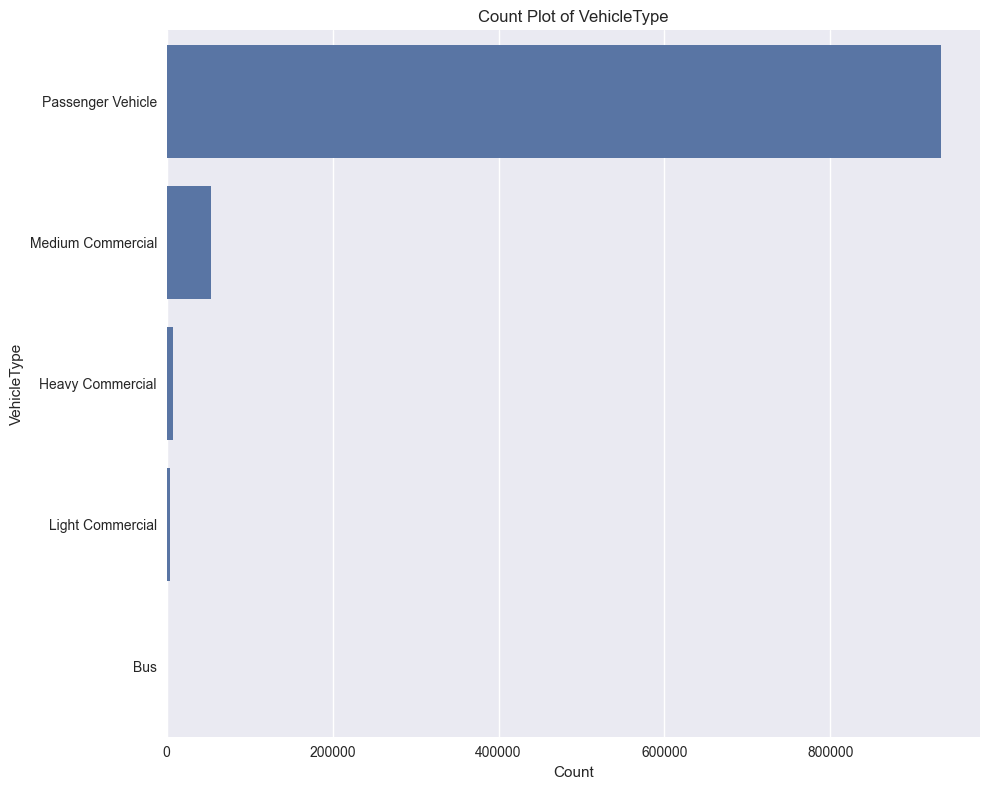

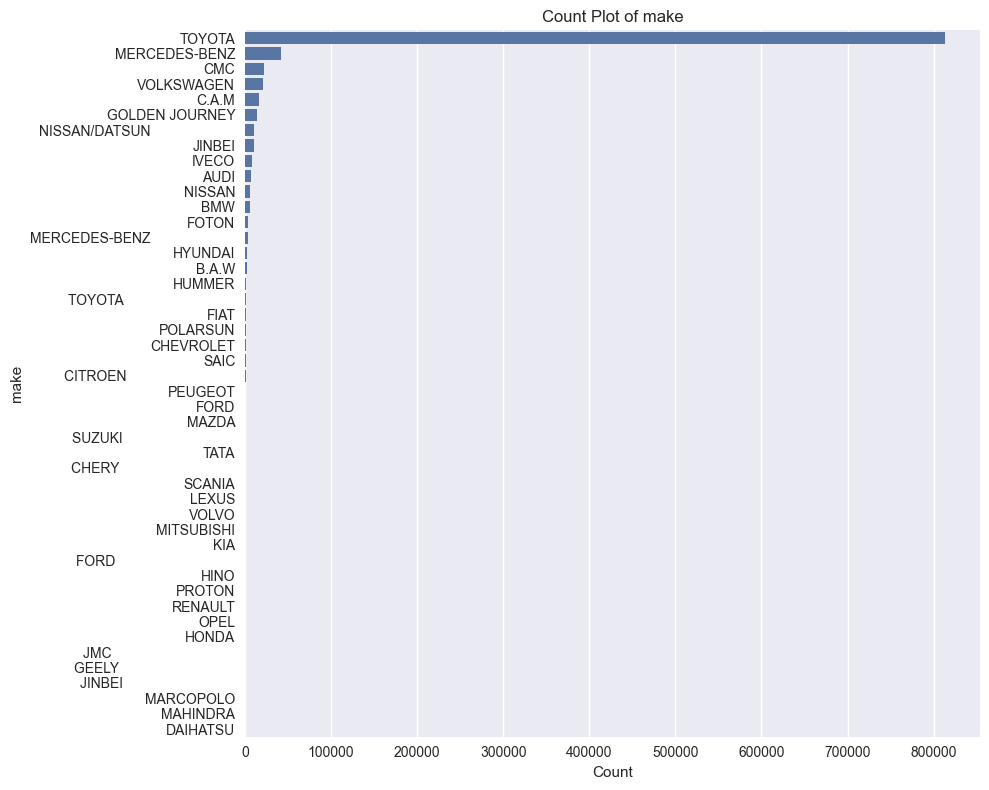

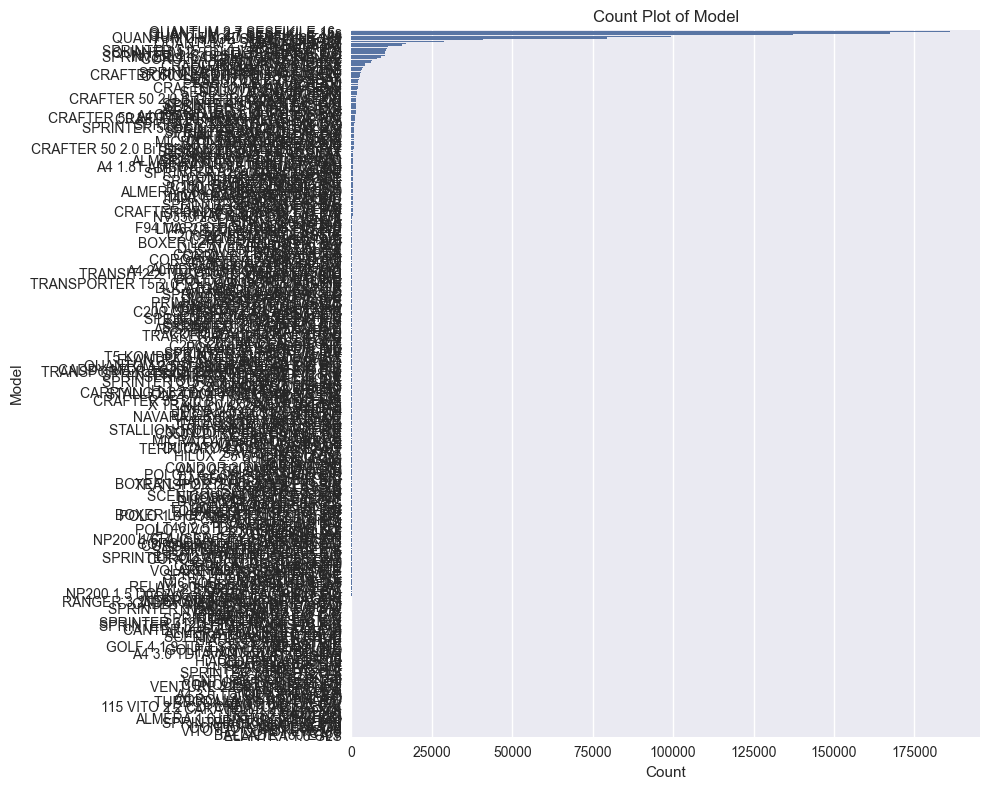

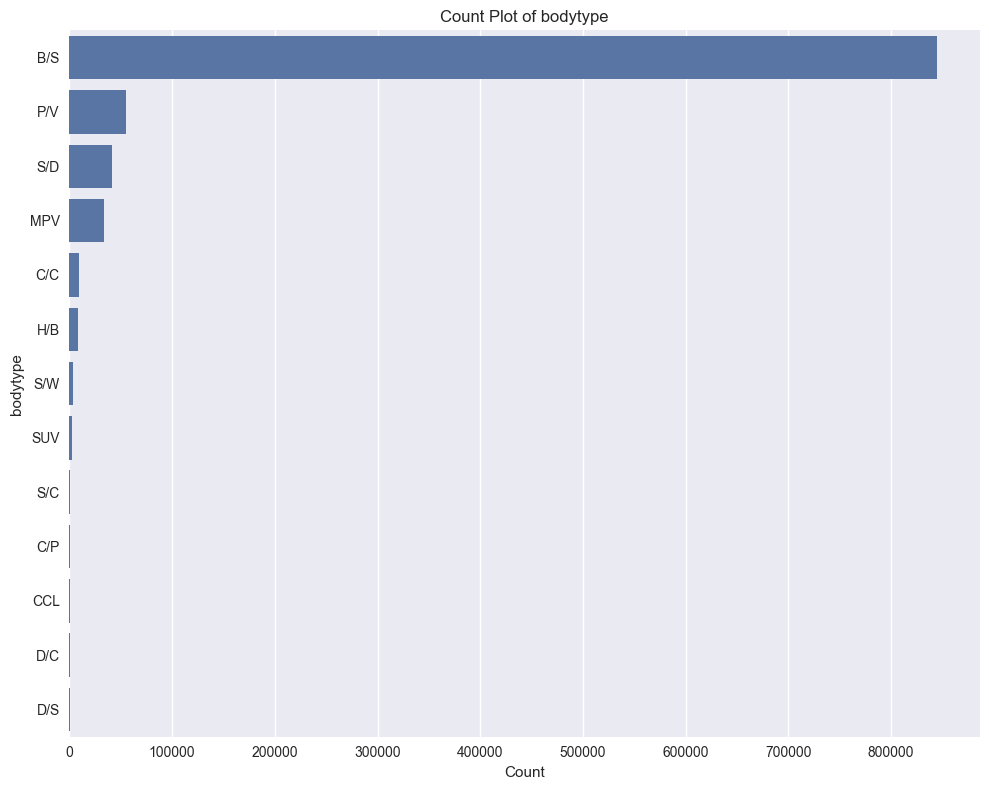

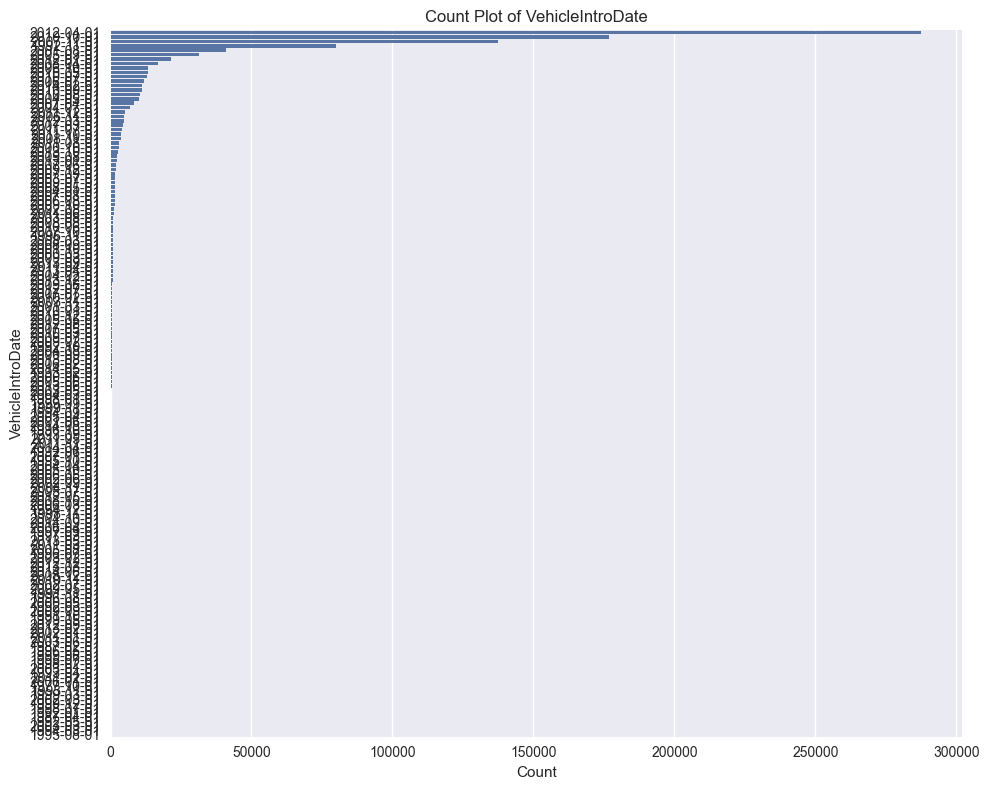

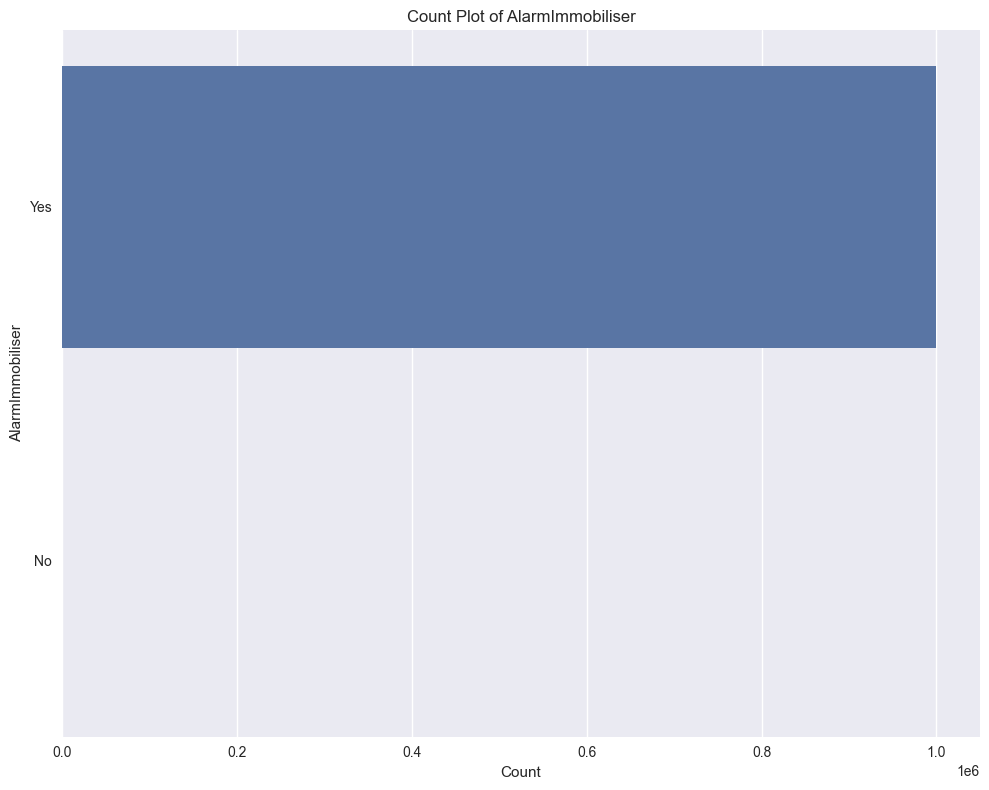

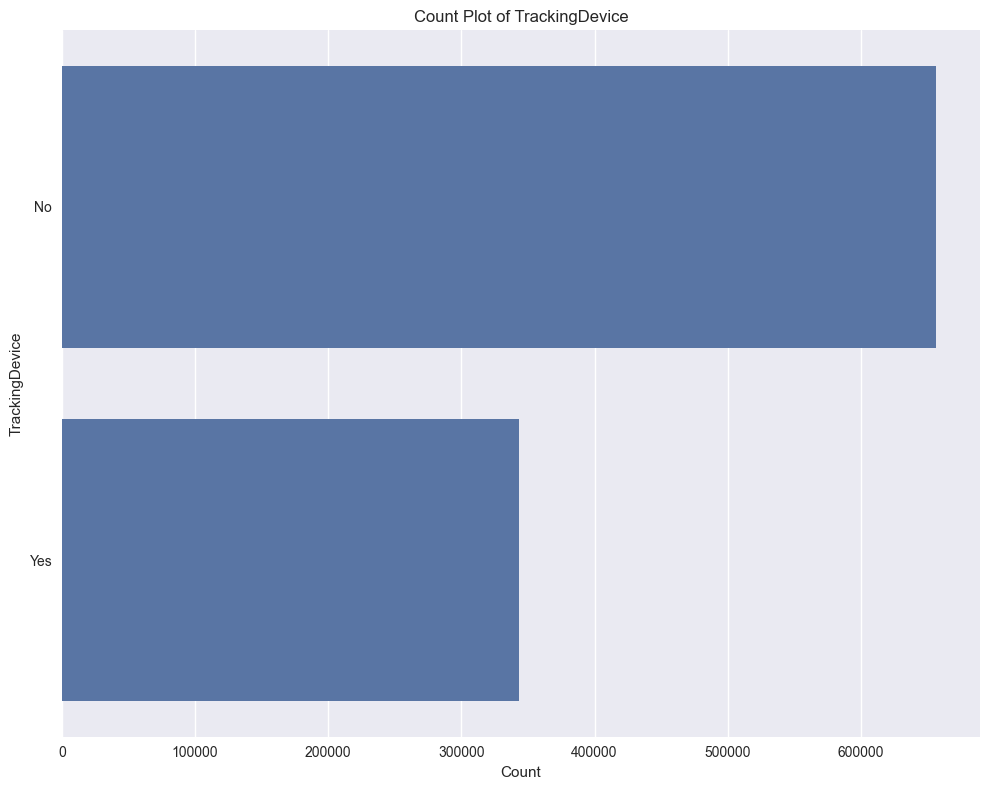

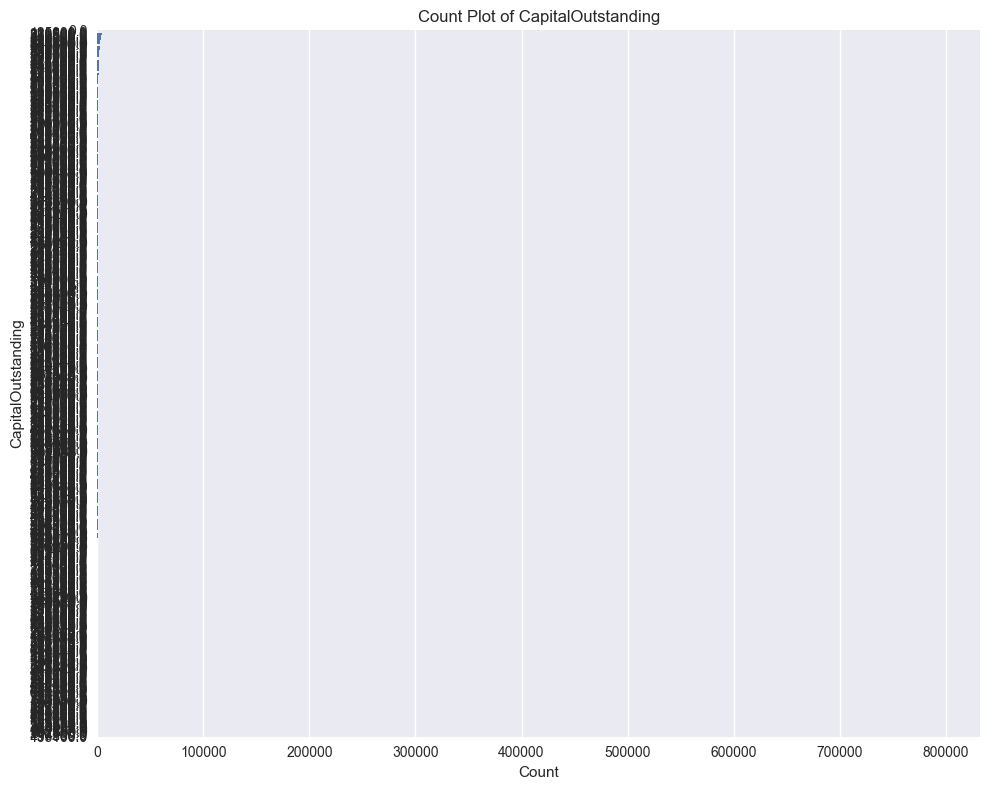

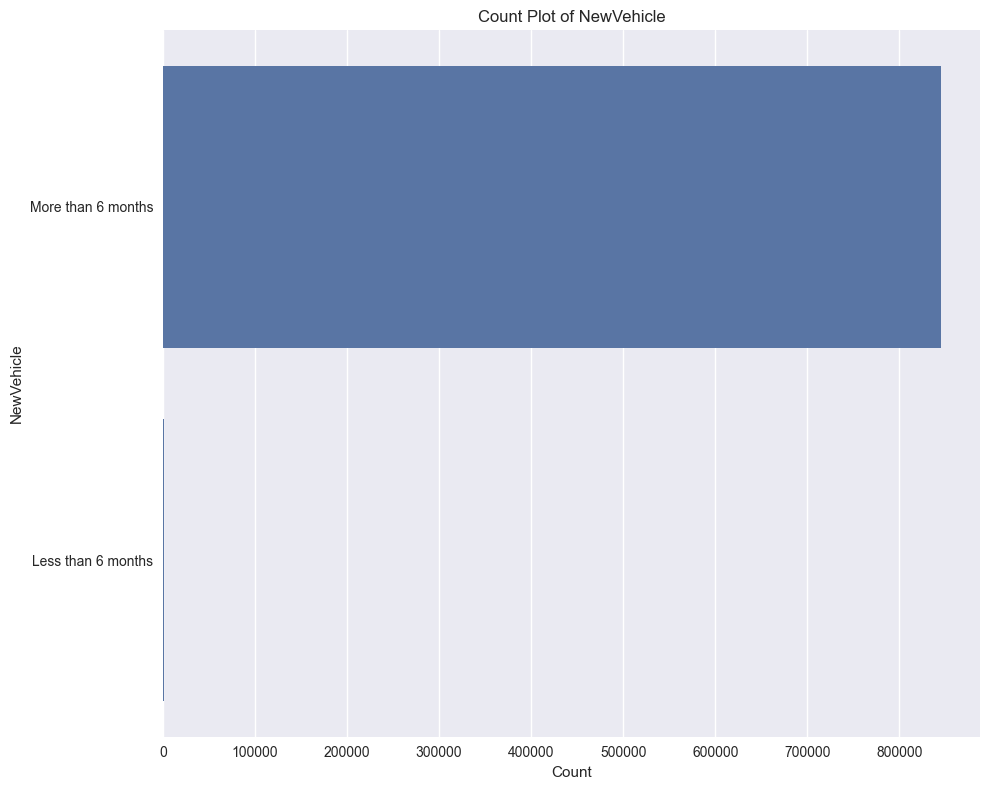

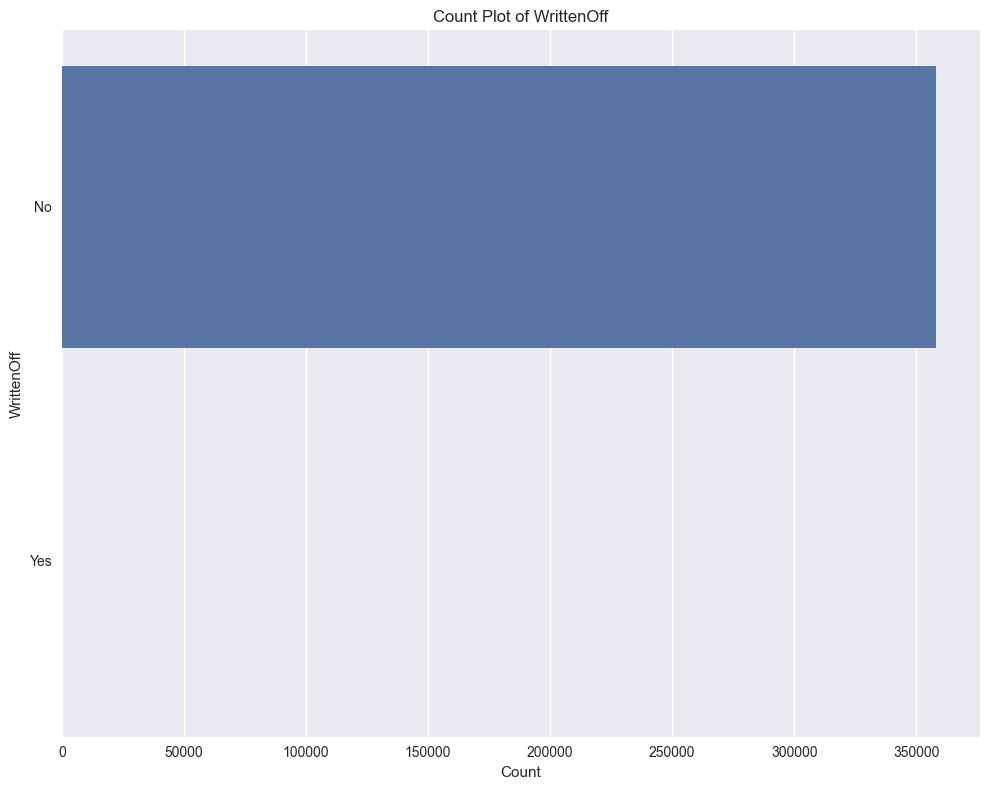

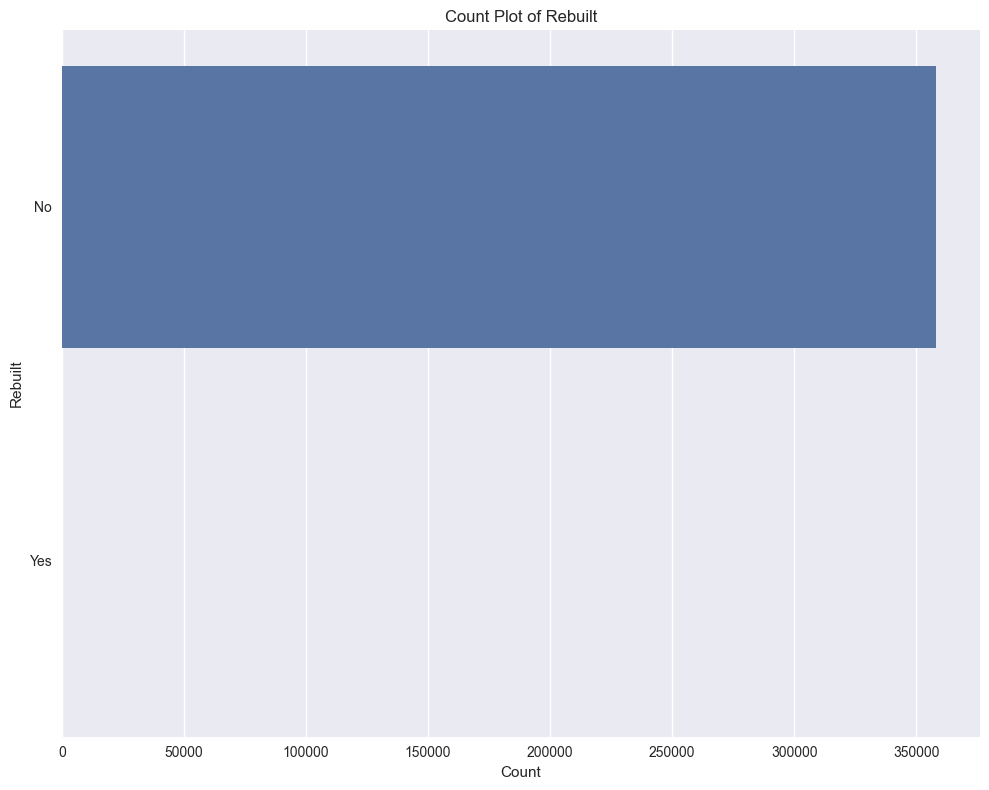

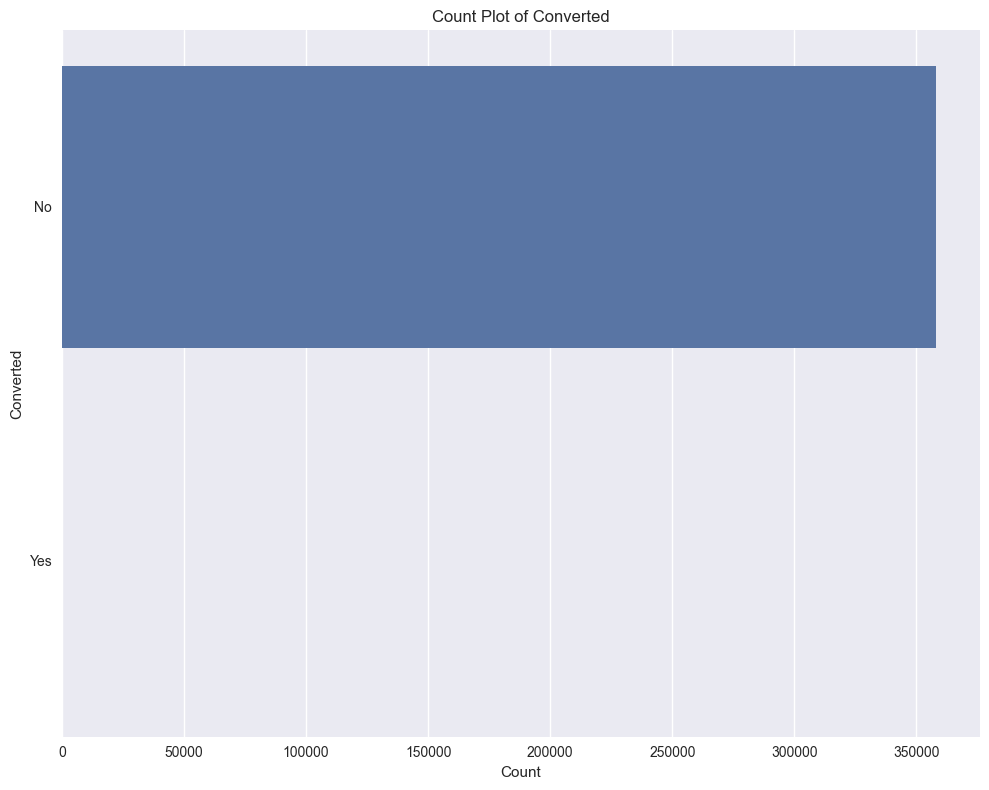

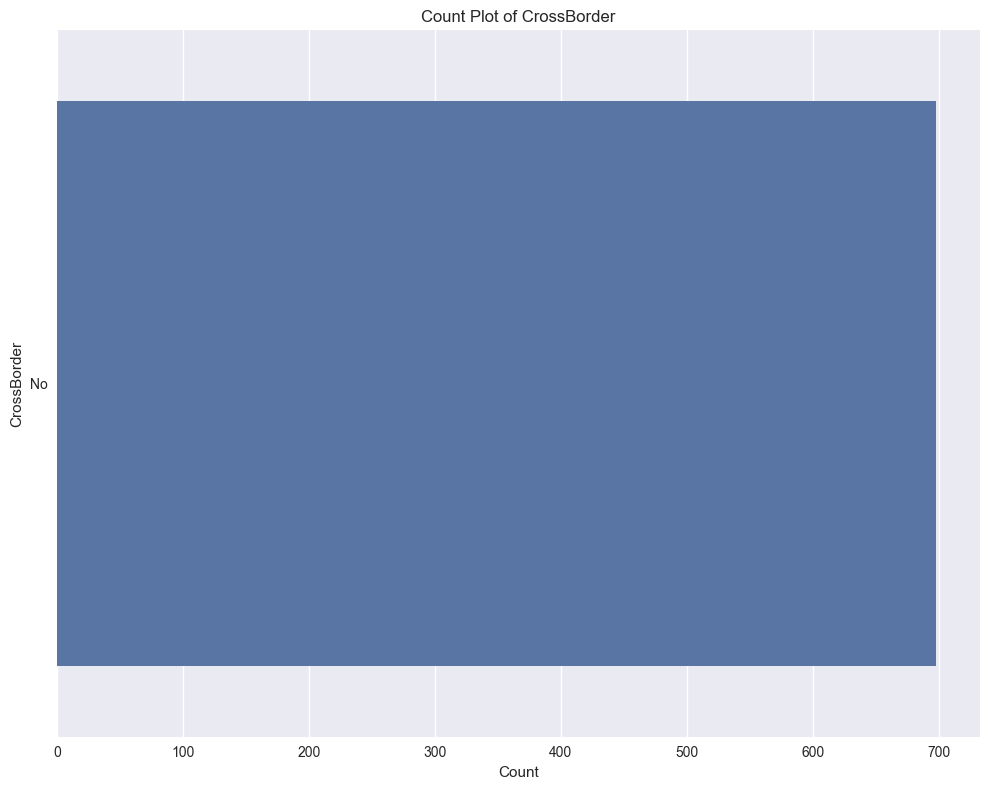

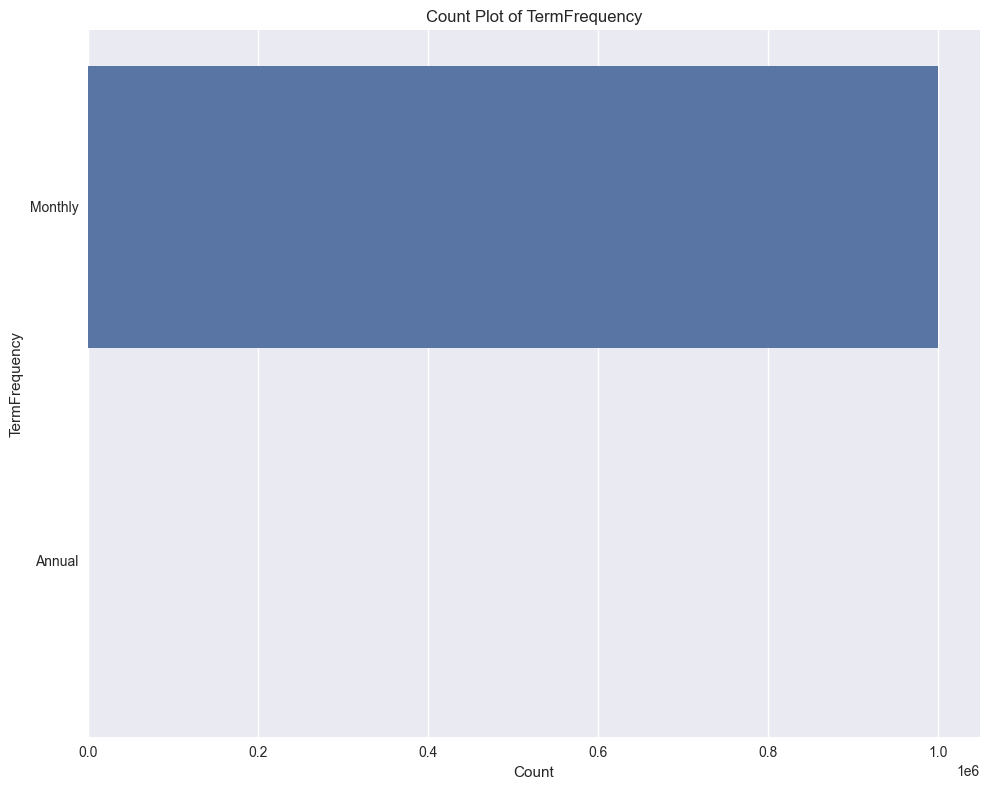

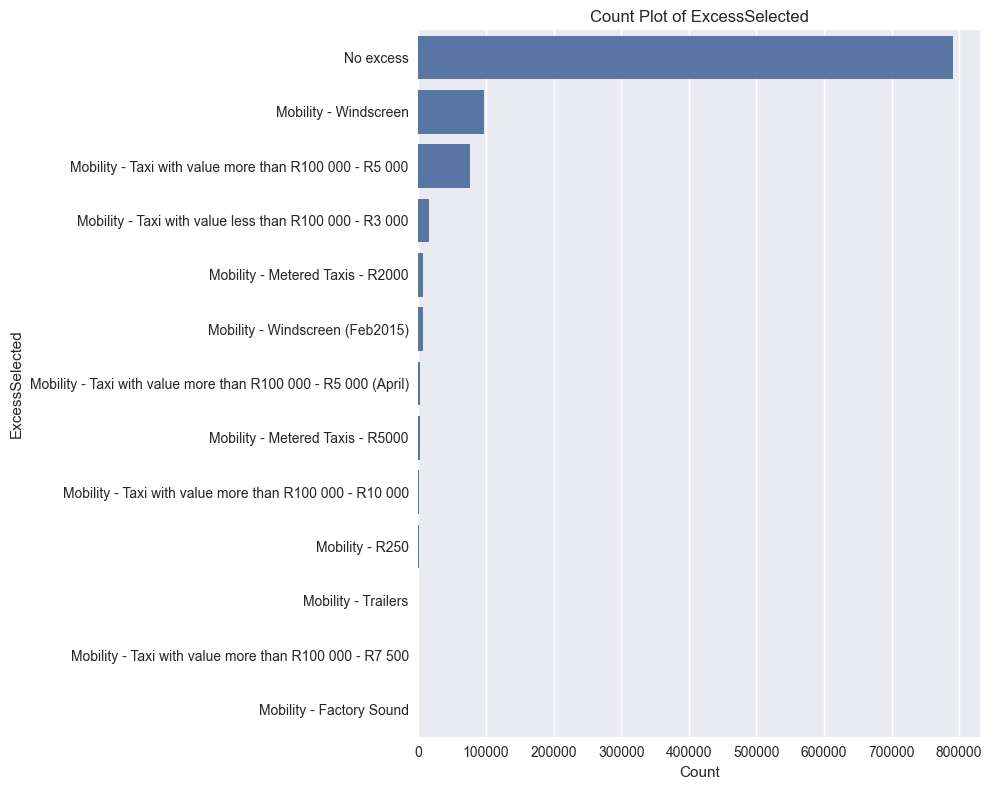

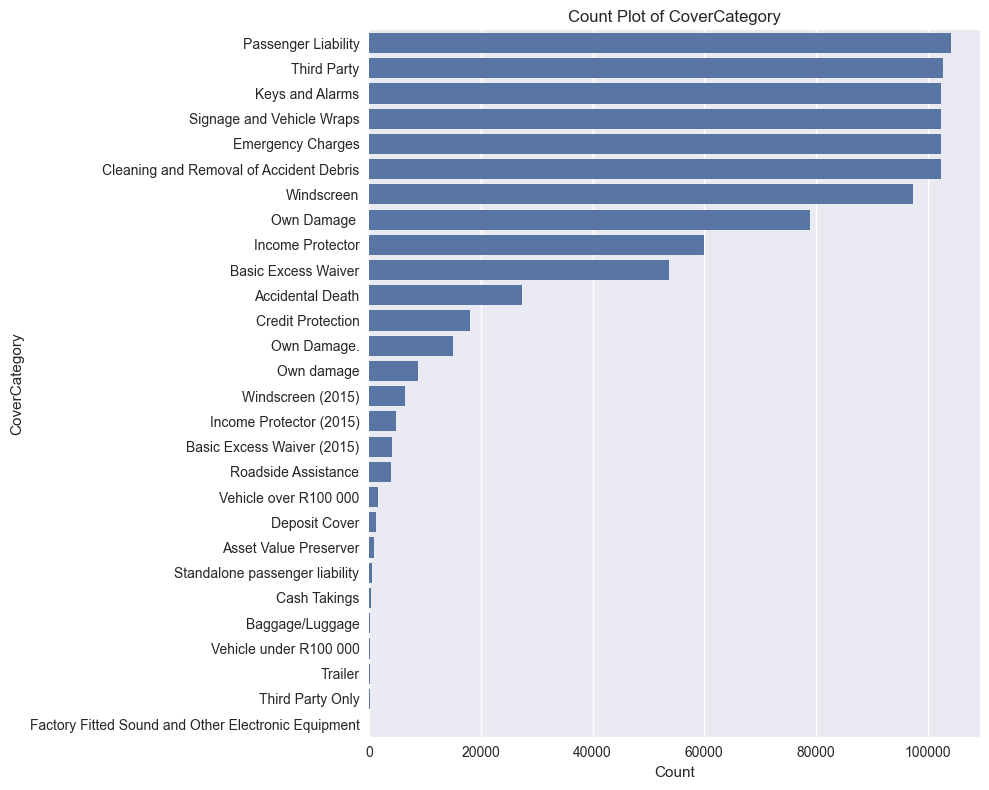

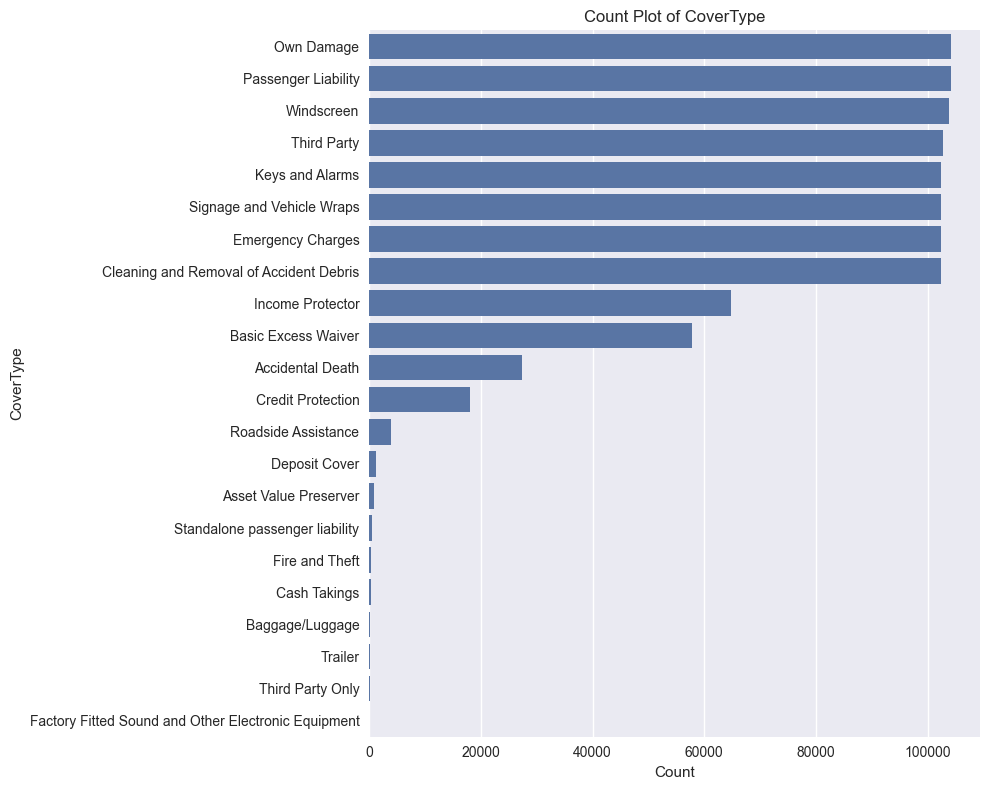

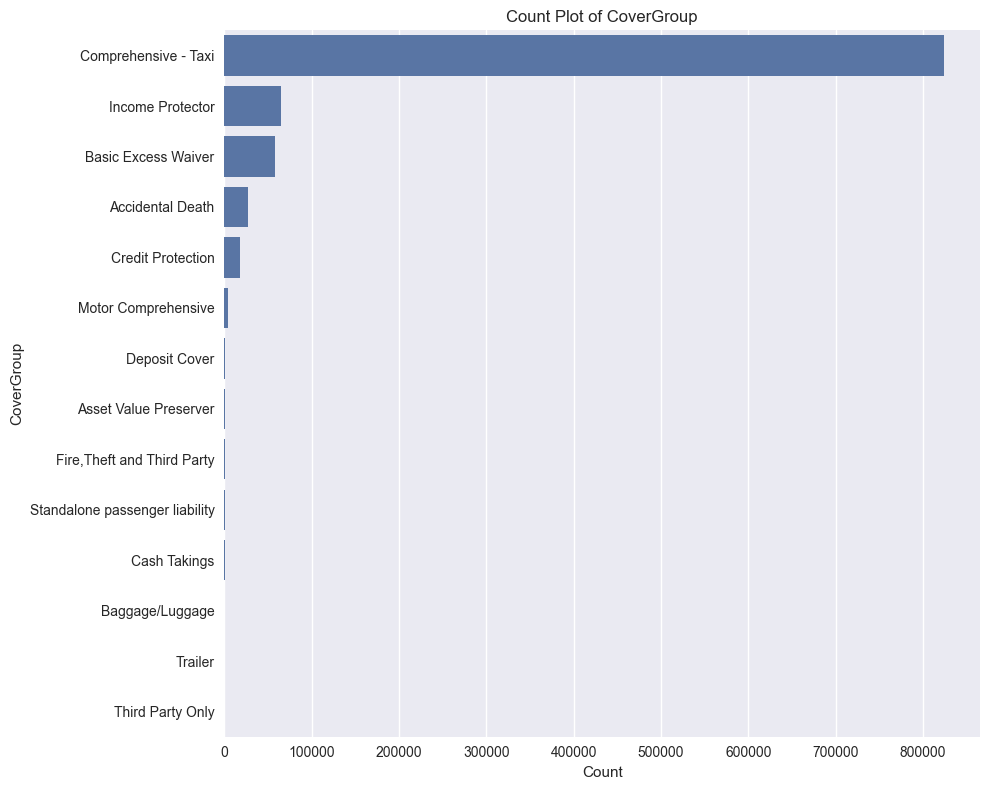

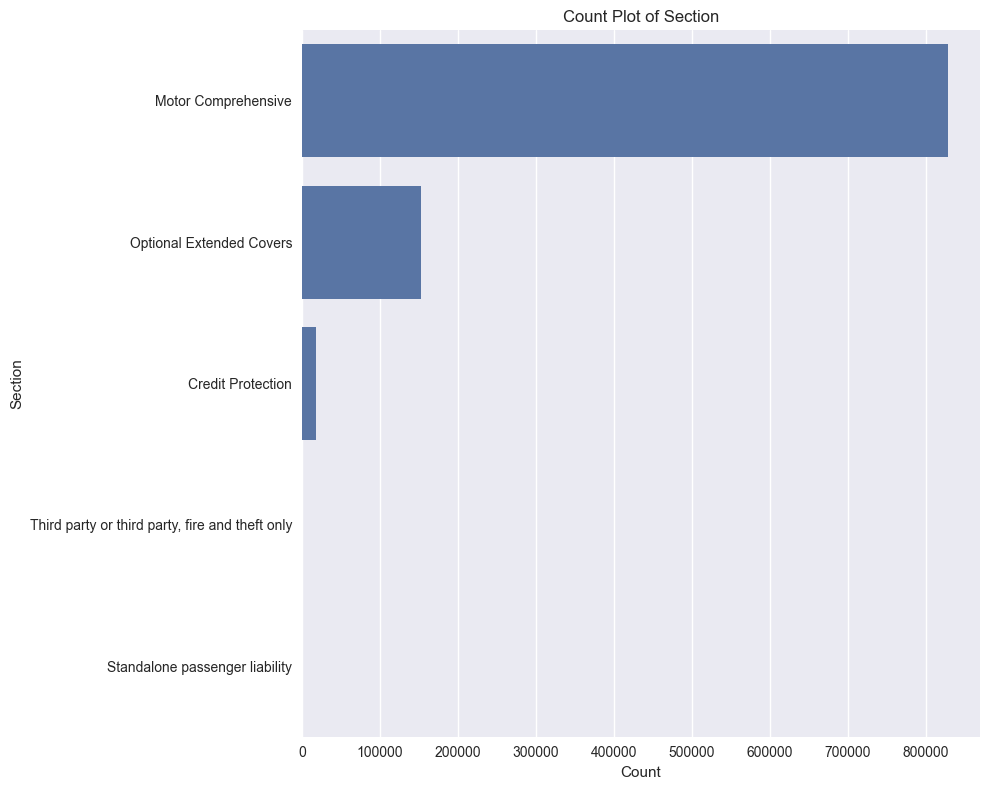

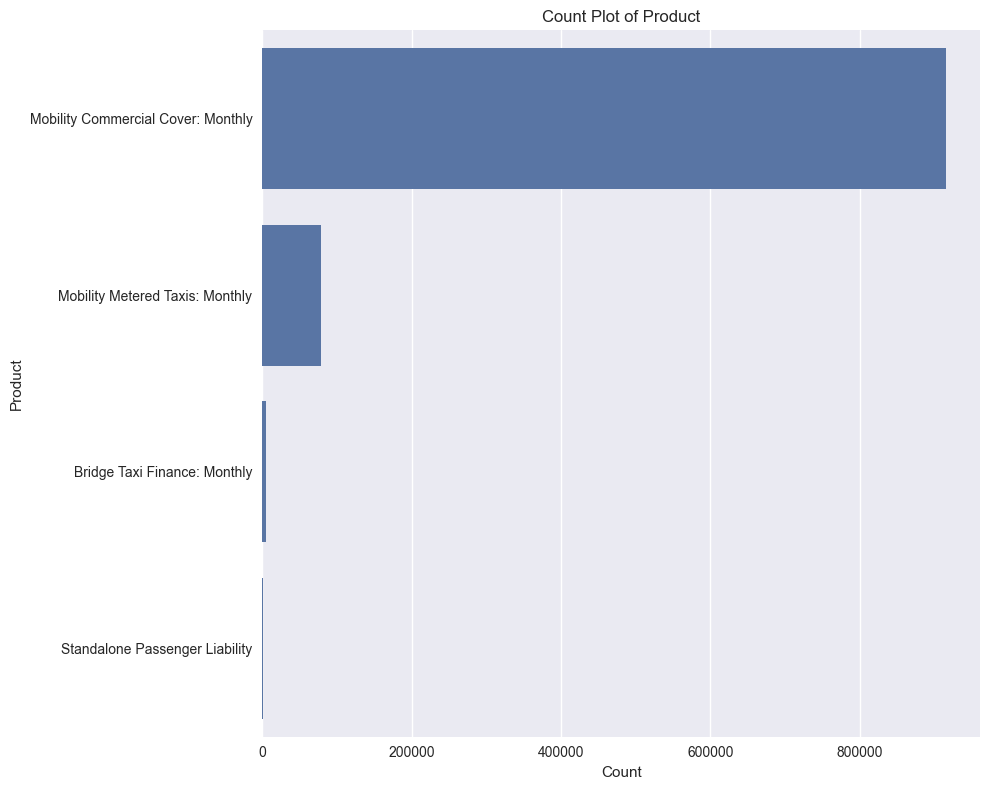

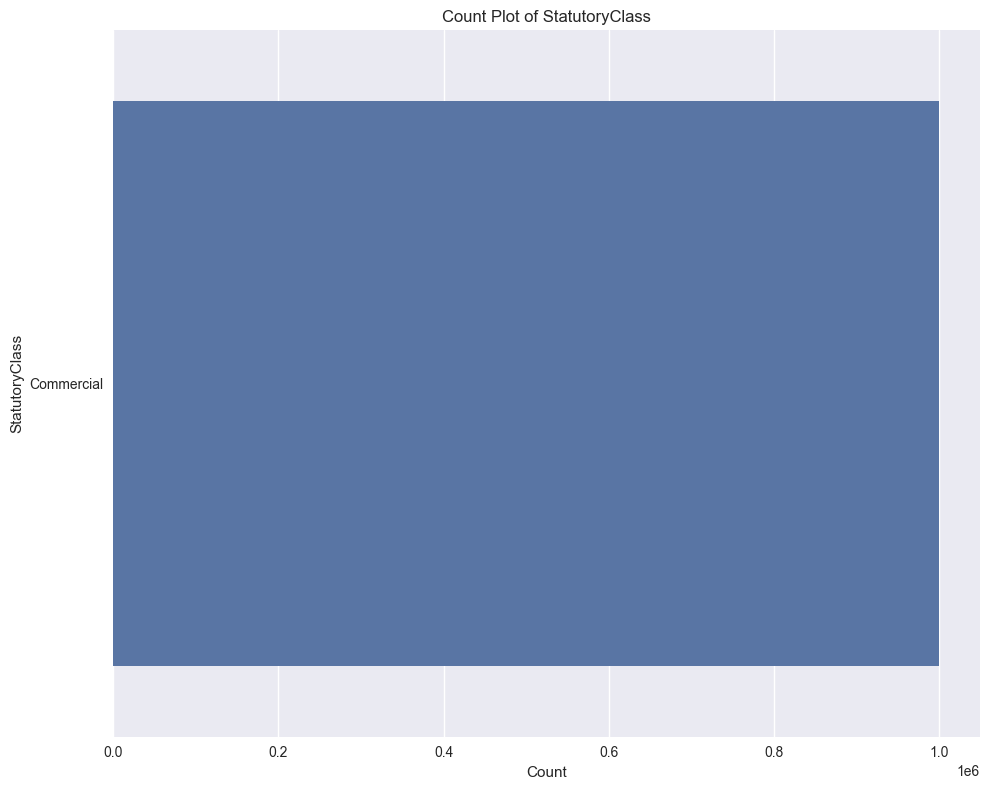

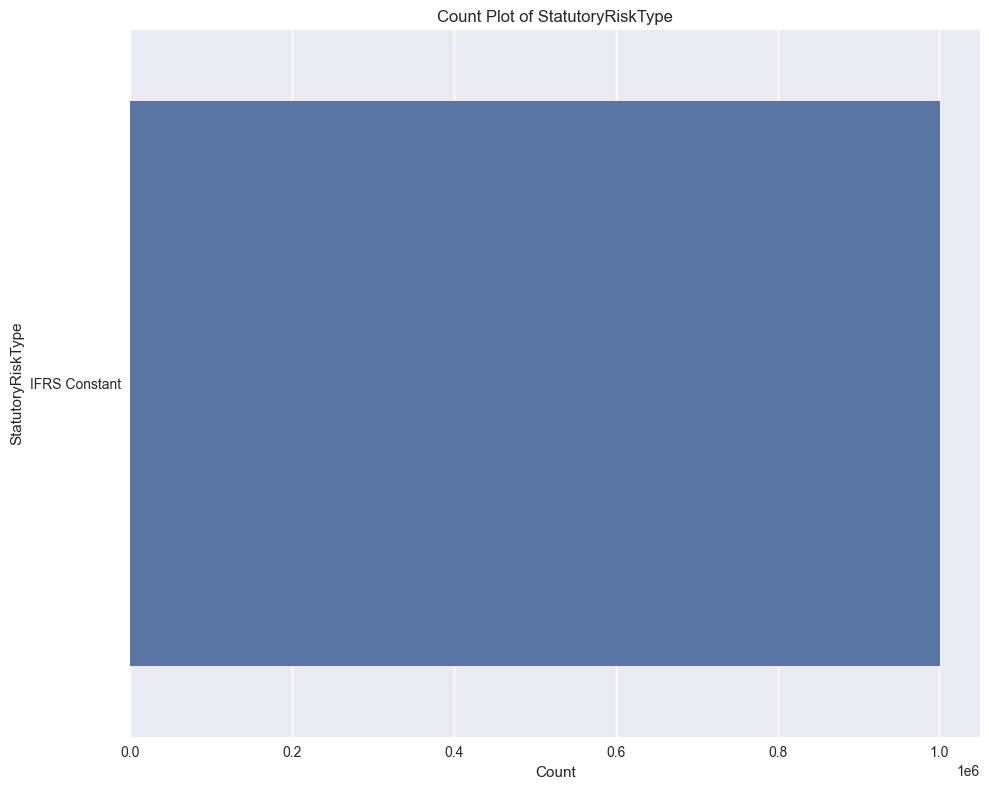

In [17]:
for col in categorical_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()
    order=df[col].value_counts().index


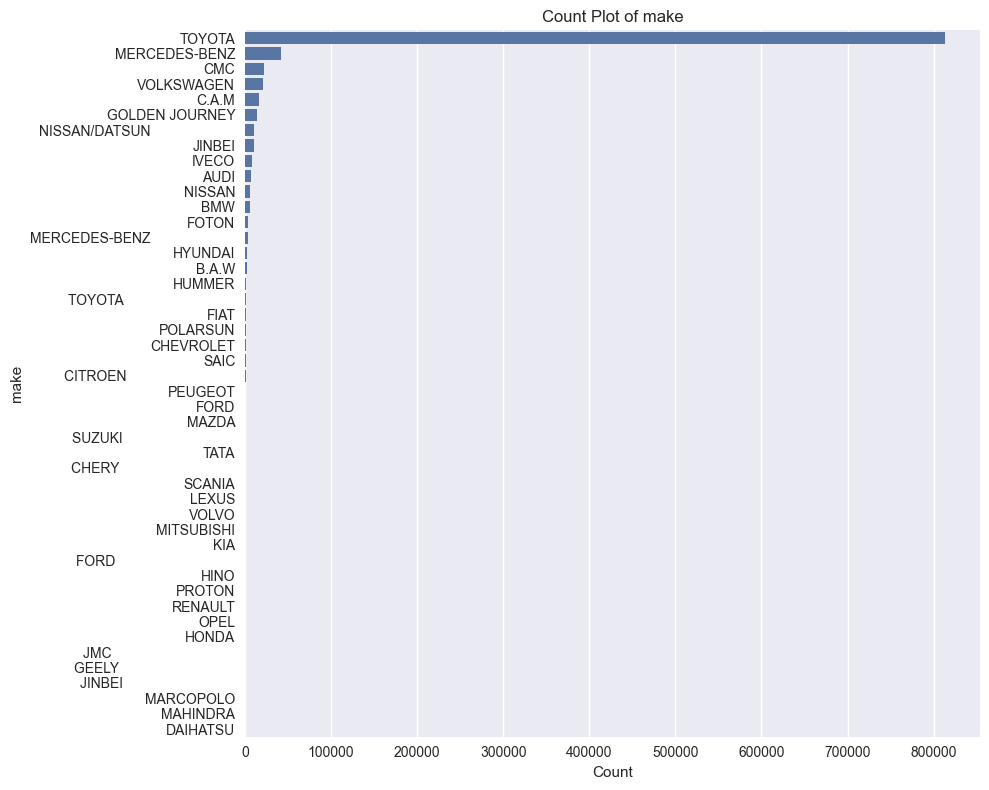

In [18]:
categorical_colss = [
    "make"
]
for col in categorical_colss:
    plt.figure(figsize=(10,8))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.ylabel(col)
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()
    order=df[col].value_counts().index


## Distribution of key financial values

#### Bar graphs of Fiancial Values 

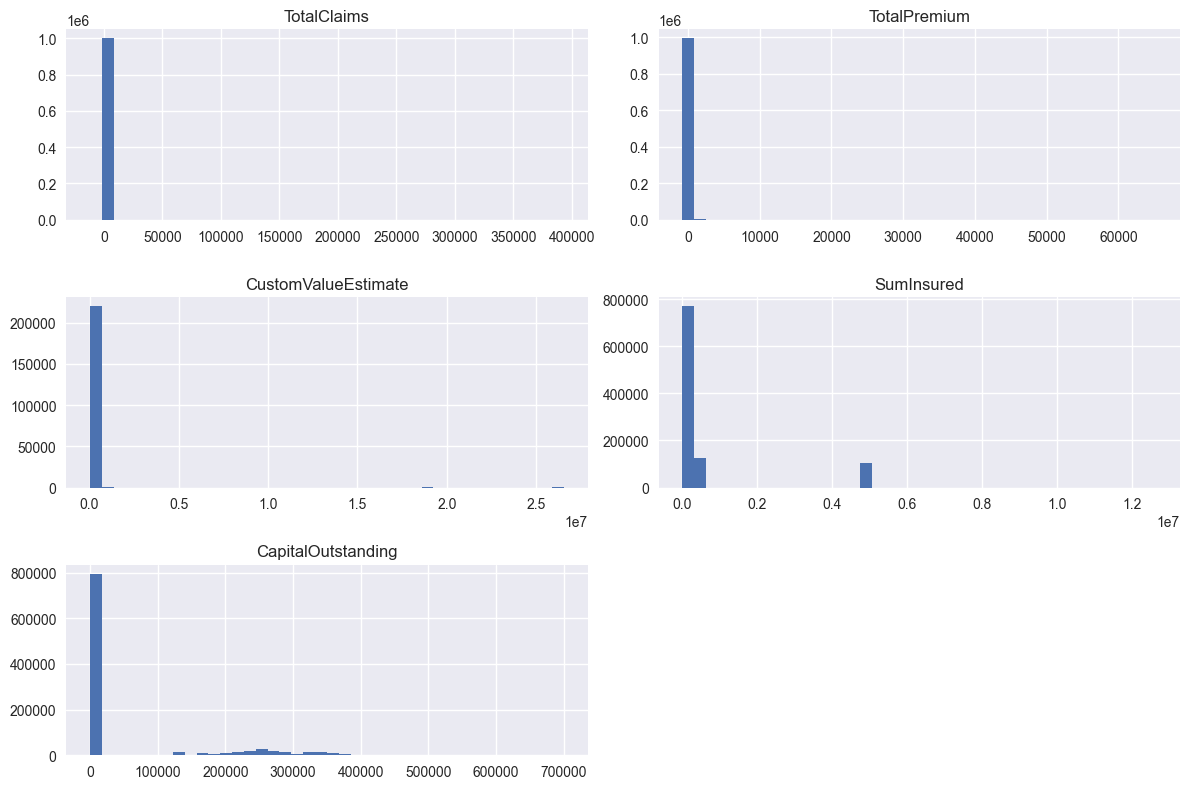

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

financial_cols = [
    "TotalClaims", 
    "TotalPremium", 
    "CustomValueEstimate",
    "SumInsured",
    "CapitalOutstanding"
]

df[financial_cols].hist(figsize=(12, 8), bins=40)
plt.tight_layout()
plt.show()

#### Box plots of Financial Values 

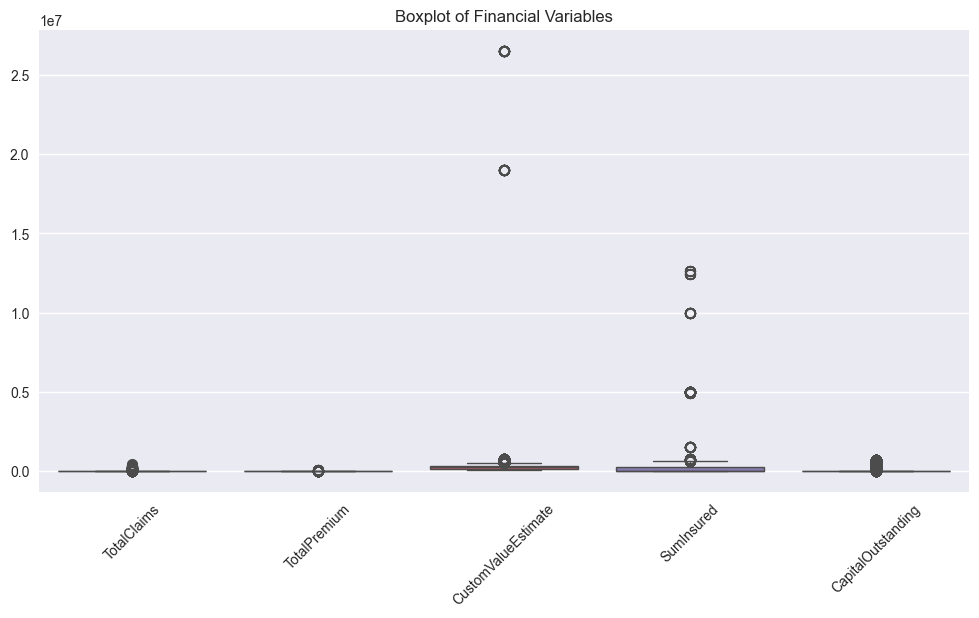

In [20]:
# Boxplot of Financial Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[financial_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Financial Variables")
plt.show()


#### IQR for financial values 

In [22]:
# IQR for Financial Variables 

import numpy as np

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

for col in financial_cols:
    outliers = detect_outliers(df[col])
    print(f"{col}: {outliers} outliers")


TotalClaims: 2793 outliers
TotalPremium: 209042 outliers
CustomValueEstimate: 1785 outliers
SumInsured: 104294 outliers
CapitalOutstanding: 206996 outliers


#### Checking increase/decrease of TotalClaims over time

YearMonth
2013-11      2
2013-12      3
2014-01      2
2014-02      6
2014-03     12
2014-04     20
2014-05     28
2014-06     28
2014-07     27
2014-08     51
2014-09     48
2014-10     93
2014-11    179
2014-12    206
2015-01    250
2015-02    287
2015-03    329
2015-04    340
2015-05    297
2015-06    297
2015-07    261
2015-08     22
Name: TotalClaims, dtype: int64


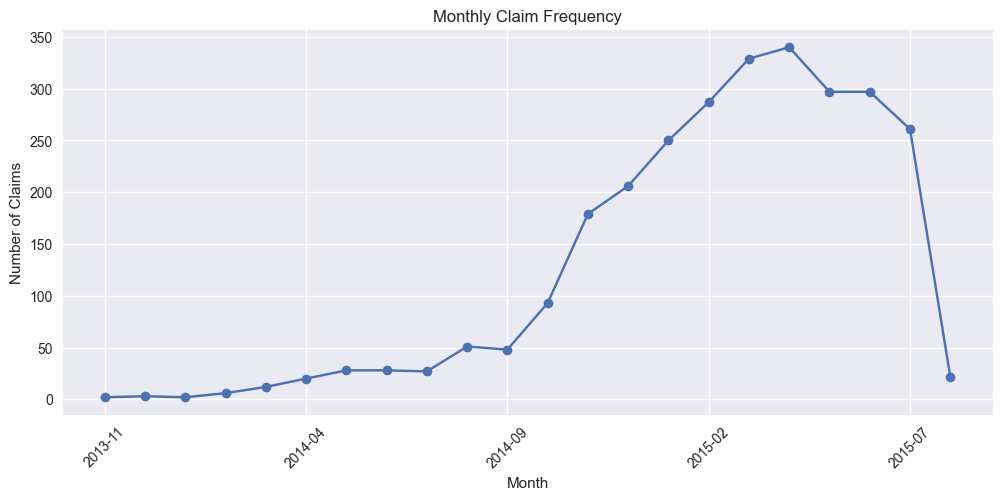

In [25]:
# Formatting the time series data for monthly claim frequency analysis for TransactionMonth
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M').astype(str)

claims_per_month = (
    df[df['TotalClaims'] > 0]
    .groupby('YearMonth')['TotalClaims']
    .count()
)
print(claims_per_month)

claims_per_month.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Monthly Claim Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.show()


In [46]:
trend_df = df.copy()

trend_df['HasClaim'] = trend_df['TotalClaims'] > 0

monthly_summary = trend_df.groupby('YearMonth').agg(
    ClaimFrequency = ('HasClaim', 'sum'),
    AvgSeverity = ('TotalClaims', 'mean'),
    TotalClaimsPaid = ('TotalClaims', 'sum')
)

print(monthly_summary)


           ClaimFrequency  AvgSeverity  TotalClaimsPaid
YearMonth                                              
2013-10                 0     0.000000     0.000000e+00
2013-11                 2    42.295217     5.058508e+04
2013-12                 3     6.209623     9.283386e+03
2014-01                 2     6.807258     1.243686e+04
2014-02                 6    30.547676     6.298931e+04
2014-03                12    93.128973     3.227850e+05
2014-04                20    44.350859     3.068636e+05
2014-05                28    54.622811     5.180427e+05
2014-06                28    42.677753     5.045364e+05
2014-07                27    28.777234     4.289822e+05
2014-08                51    35.331688     6.934197e+05
2014-09                48    34.971237     9.089024e+05
2014-10                93    52.178981     1.764693e+06
2014-11               179    78.640464     3.794245e+06
2014-12               206    99.868279     6.237473e+06
2015-01               250    76.764888     5.494

#### Claim amounts per car Make and per Model

Top Vehicle Make/Model With Highest Claims:
make           Model                           
TOYOTA         QUANTUM 2.7 SESFIKILE 16s           1.203750e+07
               QUANTUM 2.7 SESFIKILE 15s           1.151173e+07
               QUANTUM 2.7 SESFIKILE 14s           9.967764e+06
               QUANTUM 2.5 D-4D SESFIKILE 16s      7.733236e+06
               HiACE SUPER 16 F/Lift               3.275205e+06
               HiACE SIYAYA                        1.727756e+06
               QUANTUM 2.5 D-4D 14 SEAT            1.339541e+06
CMC            AMANDLA 2.2                         1.106007e+06
TOYOTA         AVANZA 1.5 SX                       1.089785e+06
MERCEDES-BENZ  SPRINTER 515 CDi HI-ROOF F/C P/V    8.874161e+05
Name: TotalClaims, dtype: float64

Vehicle Make/Model With Lowest Claims:
make                                 Model                     
VOLKSWAGEN                           LT46 2.5TDi H/ROOF F/C P/V      0.00
CITROEN                              RELAY 2.2 L2H1 15 S

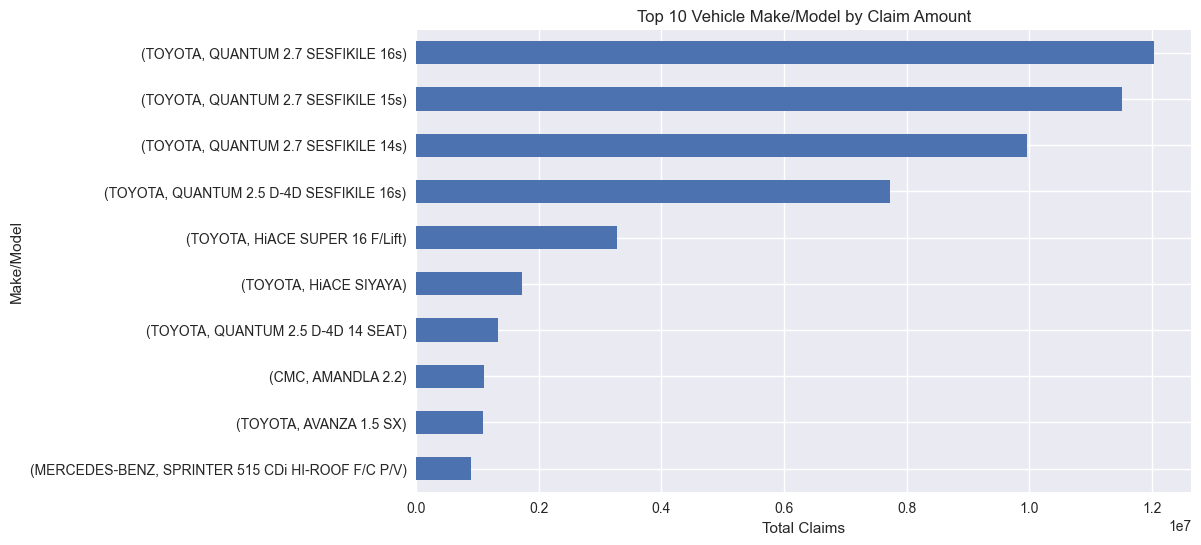

In [47]:
make_model_claims = (
    df.groupby(["make", "Model"])["TotalClaims"]
    .sum()
    .sort_values(ascending=False)
)

print("Top Vehicle Make/Model With Highest Claims:")
print(make_model_claims.head(10))

print("\nVehicle Make/Model With Lowest Claims:")
print(make_model_claims.tail(10))

make_model_claims.head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Vehicle Make/Model by Claim Amount")
plt.xlabel("Total Claims")
plt.ylabel("Make/Model")
plt.gca().invert_yaxis()
plt.show()



Province
Eastern Cape       50
Free State         11
Gauteng          1322
KwaZulu-Natal     483
Limpopo            67
Mpumalanga        128
North West        349
Northern Cape       8
Western Cape      370
Name: TotalClaims, dtype: int64


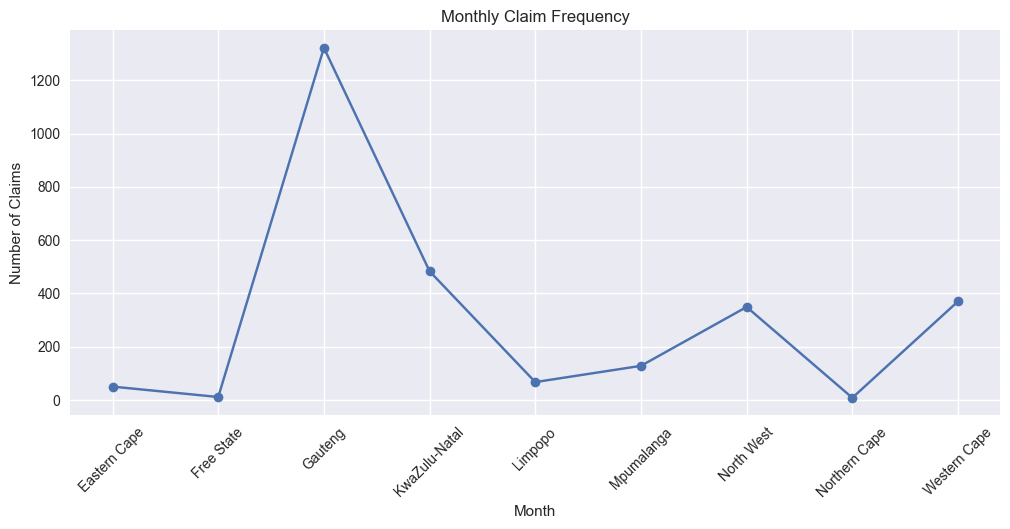

In [27]:
# Formatting the time series data for monthly claim frequency analysis for TransactionMonth
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M').astype(str)

claims_per_month = (
    df[df['TotalClaims'] > 0]
    .groupby('Province')['TotalClaims']
    .count()
)
print(claims_per_month)

claims_per_month.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Monthly Claim Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.show()

## Data cleaning prior to any Hypothesis and AB testing

In [4]:
import pandas as pd
import numpy as np
import os

# ============================================
# 1. LOAD DATA
# ============================================
df = pd.read_csv("../Data/MachineLearning_v3.csv")

print("Raw shape:", df.shape)

# ============================================
# 2. STANDARDIZE COLUMN NAMES
# ============================================
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


# ============================================
# 3. CONVERT NUMERIC FIELDS
# ============================================
num_cols = [
    "totalpremium", "totalclaims", "claimamount",
    "cubiccapacity", "kilowatts", "registrationyear"
]

for col in num_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "")
            .str.replace("etb", "", case=False)
            .str.strip()
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")


# ============================================
# 4. FIX CLAIM FLAG ISSUES
# ============================================
if "claim_flag" not in df.columns:
    df["claim_flag"] = np.where(df["totalclaims"] > 0, 1, 0)

df.loc[(df["claim_flag"] == 1) & (df["totalclaims"] == 0), "totalclaims"] = np.nan


# ============================================
# 5. REMOVE IMPOSSIBLE VALUES
# ============================================
for col in ["totalpremium", "totalclaims"]:
    if col in df.columns:
        df = df[df[col] >= 0]

df = df[df["totalpremium"] > 0]

df = df[df["totalclaims"] <= df["totalpremium"] * 10]


# ============================================
# 6. DROP DUPLICATES
# ============================================
if "policyid" in df.columns:
    df = df.drop_duplicates(subset=["policyid"], keep="first")
else:
    df = df.drop_duplicates()


# ============================================
# 7. CLEAN CATEGORICAL FIELDS
# ============================================
cat_cols = ["gender", "province", "postalcode", "maritalstatus"]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

if "gender" in df.columns:
    df["gender"] = df["gender"].replace({
        "m": "male", "male ": "male",
        "f": "female", "femal": "female"
    })


# ============================================
# 8. HANDLE MISSING CATEGORICAL VALUES
# ============================================
for col in ["province", "postalcode", "gender"]:
    if col in df.columns:
        df[col].fillna("unknown", inplace=True)


# ============================================
# 9. REDUCE SPARSE CATEGORIES
# ============================================
if "postalcode" in df.columns:
    top_zip = df["postalcode"].value_counts().nlargest(20).index
    df["postalcode"] = df["postalcode"].apply(
        lambda x: x if x in top_zip else "other"
    )

if "province" in df.columns:
    top_provinces = df["province"].value_counts().nlargest(15).index
    df["province"] = df["province"].apply(
        lambda x: x if x in top_provinces else "other"
    )


# ============================================
# 10. CREATE RISK KPIs
# ============================================
df["claim_frequency"] = df["claim_flag"]
df["claim_severity"] = np.where(df["claim_flag"] == 1, df["totalclaims"], np.nan)
df["margin"] = df["totalpremium"] - df["totalclaims"]


# ============================================
# 11. FINAL NA FILTERING
# ============================================
df = df.dropna(subset=["claim_frequency", "margin"])


# ============================================
# 12. SAVE CLEAN DATA
# ============================================

# Create output folder if not exists
output_dir = "../Data"
os.makedirs(output_dir, exist_ok=True)

output_path = f"{output_dir}/MLCleaned.csv"

df.to_csv(output_path, index=False)

print("======================================")
print("CLEANED DATA SAVED!")
print("Path:", output_path)
print("Final shape:", df.shape)


C:\Users\hp\AppData\Local\Temp\ipykernel_22156\2623646933.py:8: DtypeWarning: Columns (14,20,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/MachineLearning_v3.csv")


Raw shape: (1000098, 52)
CLEANED DATA SAVED!
Path: ../Data/MLCleaned.csv
Final shape: (0, 56)


## Choosing the key performance indicator (KPI)

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

def compute_risk_metrics(df):
    """Adds ClaimFrequency, ClaimSeverity, Margin."""
    
    df = df.copy()
    
    # Claim occurred (1/0)
    df["HasClaim"] = df["TotalClaims"].apply(lambda x: 1 if x > 0 else 0)
    
    # Frequency = proportion of claims
    df["ClaimFrequency"] = df["HasClaim"]
    
    # Severity only for claim > 0
    df["ClaimSeverity"] = df["TotalClaims"].apply(lambda x: x if x > 0 else np.nan)
    
    # Profit margin
    df["Margin"] = df["TotalPremium"] - df["TotalClaims"]
    
    return df

def chi_square_test(df, feature, kpi="ClaimFrequency"):
    """
    Applies chi-square test for independence between
    a categorical feature and Claim Frequency.
    """

    contingency = pd.crosstab(df[feature], df[kpi])
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    return {
        "Test": "Chi-Square",
        "Feature": feature,
        "P-Value": p,
        "Reject H0": p < 0.05
    }

def t_test(df, feature, kpi="Margin"):
    """
    Performs independent t-test for numerical KPIs across groups.
    Feature must have exactly 2 groups.
    """
    
    groups = df[feature].dropna().unique()
    if len(groups) != 2:
        return {"Error": "Feature must have exactly 2 groups"}
    
    g1, g2 = groups[0], groups[1]
    
    data1 = df[df[feature]==g1][kpi].dropna()
    data2 = df[df[feature]==g2][kpi].dropna()
    
    tstat, p = ttest_ind(data1, data2, equal_var=False)
    
    return {
        "Test": "T-Test",
        "Feature": feature,
        "Groups": (g1, g2),
        "P-Value": p,
        "Reject H0": p < 0.05
    }

def run_task3_hypothesis_tests(df):
    results = {}
    
    # -----------------------------------
    # 1. RISK DIFFERENCES ACROSS PROVINCES
    # Chi-square → Claim Frequency
    # -----------------------------------
    results["Province Risk Difference"] = chi_square_test(
        df, feature="Province", kpi="ClaimFrequency"
    )
    
    # -----------------------------------
    # 2. RISK DIFFERENCES BETWEEN ZIP CODES
    # -----------------------------------
    results["Zip Code Risk Difference"] = chi_square_test(
        df, feature="PostalCode", kpi="ClaimFrequency"
    )
    
    # -----------------------------------
    # 3. MARGIN DIFFERENCE BETWEEN ZIP CODES
    # Requires reduction to exactly 2 groups
    # Example: Top 2 most common zip codes
    # -----------------------------------
    top_zip = df["PostalCode"].value_counts().index[:2]
    df_zip = df[df["PostalCode"].isin(top_zip)]

    results["Margin Difference Zip Codes"] = t_test(
        df_zip, feature="PostalCode", kpi="Margin"
    )
    
    # -----------------------------------
    # 4. RISK DIFFERENCE BETWEEN WOMEN & MEN
    # Chi-square (frequency) or T-test (severity)
    # -----------------------------------
    df_gender = df[df["Gender"].isin(["Male","Female"])]

    results["Gender Risk Difference"] = chi_square_test(
        df_gender, feature="Gender", kpi="ClaimFrequency"
    )
    
    return results

df = compute_risk_metrics(df)           # add KPI columns
results = run_task3_hypothesis_tests(df)

for name, res in results.items():
    print("\n====================")
    print(name)
    print(res)



Province Risk Difference
{'Test': 'Chi-Square', 'Feature': 'Province', 'P-Value': np.float64(5.925510718204678e-19), 'Reject H0': np.True_}

Zip Code Risk Difference
{'Test': 'Chi-Square', 'Feature': 'PostalCode', 'P-Value': np.float64(3.152172246339057e-30), 'Reject H0': np.True_}

Margin Difference Zip Codes
{'Test': 'T-Test', 'Feature': 'PostalCode', 'Groups': (np.int64(2000), np.int64(122)), 'P-Value': np.float64(0.24446241842452016), 'Reject H0': np.False_}

Gender Risk Difference
{'Test': 'Chi-Square', 'Feature': 'Gender', 'P-Value': np.float64(0.9514644755420456), 'Reject H0': np.False_}


| Hypothesis                               | Result            | A/B Group Construction                                                                                       | Interpretation                                                                                                                                     |
| ---------------------------------------- | ----------------- | ------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Province affects risk**                | ✔ Significant     | Group A = Low-risk provinces; Group B = High-risk provinces (balanced on client & vehicle attributes)        | After rebalancing comparable segments, provinces still show meaningful differences in claim rates → location-based risk exists.                    |
| **Postal Code (Zip) affects risk**       | ✔ Significant     | Group A = Selected zip codes; Group B = Comparison zip codes (matched for demographics & vehicle attributes) | Even when controlling for customer and vehicle characteristics, certain postal codes show higher/lower risk → micro-geographic clustering is real. |
| **Profit margin differs by postal code** | ❌ Not Significant | Groups created using same A/B segmentation as above                                                          | Pricing adjustments appear to compensate for the differences in risk. Actuarial pricing remains fair across zip codes.                             |
| **Gender affects risk**                  | ❌ Not Significant | Group A = Male; Group B = Female (balanced on age, plan, region, vehicle type)                               | Once matched on confounders (age, province, vehicle), no statistical difference in risk → gender is not a meaningful predictor of risk.            |


### Data segmentation

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

# ===========================================================
# A/B SEGMENTATION FUNCTION
# ===========================================================

def create_ab_groups(df, feature, min_size=200):
    """
    Creates valid A/B groups for hypothesis testing.
    Ensures:
    - Only feature differs
    - All other attributes are statistically equivalent
    """

    # Select 2 largest categories for stable tests
    top_values = df[feature].value_counts().index[:2]

    if len(top_values) < 2:
        print("❌ Not enough categories for A/B test.")
        return None, None

    A_val, B_val = top_values[0], top_values[1]

    group_A = df[df[feature] == A_val]
    group_B = df[df[feature] == B_val]

    # Check minimum size
    if len(group_A) < min_size or len(group_B) < min_size:
        print("❌ Groups too small for valid A/B testing.")
        return None, None

    print(f"Proposed A/B split: {feature} = '{A_val}' vs '{B_val}'")
    print(f"Sizes: A={len(group_A)}, B={len(group_B)}")
    print("\nChecking equivalence on other attributes...\n")

    # Attributes to test for equivalence
    categorical_cols = [
        "Gender", "MaritalStatus", "LegalType", "Citizenship", "Language", "Bank",
        "VehicleType", "make", "Model", "bodytype",
        "CoverType", "Product", "StatutoryClass"
    ]

    numeric_cols = ["RegistrationYear", "cubiccapacity", "kilowatts"]

    # =======================================================
    # 1. Test categorical equivalence with chi-square
    # =======================================================
    for col in categorical_cols:
        if col not in df.columns:
            continue
        
        contingency = pd.crosstab(df[col], df[feature])
        
        if contingency.shape[0] < 2:
            continue
        
        chi2, p, dof, exp = chi2_contingency(contingency)

        if p < 0.05:
            print(f"❌ Groups differ significantly by {col} (p={p:.4f})")
            return None, None

    # =======================================================
    # 2. Test numeric equivalence with T-tests
    # =======================================================
    for col in numeric_cols:
        if col not in df.columns:
            continue
        
        A_vals = group_A[col].dropna()
        B_vals = group_B[col].dropna()

        if len(A_vals) < 30 or len(B_vals) < 30:
            continue

        tstat, p = ttest_ind(A_vals, B_vals, equal_var=False)

        if p < 0.05:
            print(f"❌ Groups differ significantly in numeric feature {col} (p={p:.4f})")
            return None, None

    print("✅ Groups are statistically equivalent except for the tested feature.")
    return group_A, group_B


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def test_equivalence(df, feature, groupA, groupB, numerical_cols, categorical_cols):
    A = df[df[feature] == groupA]
    B = df[df[feature] == groupB]

    results = {}

    # Test categorical variables
    for col in categorical_cols:
        if col == feature: 
            continue
        try:
            contingency = pd.crosstab(df[col], df[feature])
            chi2, p, _, _ = chi2_contingency(contingency)
            results[col] = ("Categorical", p, p > 0.05)
        except:
            results[col] = ("Categorical", None, False)

    # Test numeric variables
    for col in numerical_cols:
        try:
            stat, p = ttest_ind(A[col], B[col], nan_policy="omit")
            results[col] = ("Numerical", p, p > 0.05)
        except:
            results[col] = ("Numerical", None, False)

    return results


def validate_feature_for_AB(df, feature, numerical_cols, categorical_cols):
    categories = df[feature].dropna().unique()

    if len(categories) < 2:
        print(f"Feature {feature} does not have at least two categories.")
        return

    print(f"\n====== Testing A/B segmentation for: {feature} ======")

    # Try all pair combinations
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            A = categories[i]
            B = categories[j]

            print(f"\n--- Testing Pair: {A} vs {B} ---")
            results = test_equivalence(df, feature, A, B, numerical_cols, categorical_cols)

            valid = all([val[2] for val in results.values()])

            print("VALID A/B PAIR?" , "YES" if valid else "NO")

            for k, v in results.items():
                print(f"{k} | Type:{v[0]} | p={v[1]} | Equivalent={v[2]}")

            if valid:
                print(f"\n>>> Selected A/B pair for feature '{feature}': {A} (Group A), {B} (Group B)")
                return A, B

    print(f"\nNo valid A/B pair found for {feature}. You may need to rebalance or clean the data.")
    return None, None


In [8]:
numerical_cols = ["TotalPremium", "TotalClaims", "ClaimFrequency", "ClaimSeverity", "Margin"]
categorical_cols = ["Gender", "LegalType", "Province", "PostalCode", "VehicleType"]

groupA, groupB = validate_feature_for_AB(df, "Province", numerical_cols, categorical_cols)



====== Testing A/B segmentation for: Province ======

--- Testing Pair: Gauteng vs KwaZulu-Natal ---
VALID A/B PAIR? NO
Gender | Type:Categorical | p=0.0 | Equivalent=False
LegalType | Type:Categorical | p=0.0 | Equivalent=False
PostalCode | Type:Categorical | p=0.0 | Equivalent=False
VehicleType | Type:Categorical | p=0.0 | Equivalent=False
TotalPremium | Type:Numerical | p=8.399632634531276e-256 | Equivalent=False
TotalClaims | Type:Numerical | p=0.1928243511228342 | Equivalent=True
ClaimFrequency | Type:Numerical | p=0.0018135508853188399 | Equivalent=False
ClaimSeverity | Type:Numerical | p=0.0002452952541313687 | Equivalent=False
Margin | Type:Numerical | p=0.33195182732162687 | Equivalent=True

--- Testing Pair: Gauteng vs Mpumalanga ---
VALID A/B PAIR? NO
Gender | Type:Categorical | p=0.0 | Equivalent=False
LegalType | Type:Categorical | p=0.0 | Equivalent=False
PostalCode | Type:Categorical | p=0.0 | Equivalent=False
VehicleType | Type:Categorical | p=0.0 | Equivalent=False
To

### Rebalalcing the data for hyphothesis testing

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split

# ============================================================
# 1. LOAD DATA
# ============================================================

df = pd.read_csv("../Data/MachineLearning_v3.csv")  # UPDATE PATH IF NEEDED
print("Raw shape:", df.shape)


# ============================================================
# 2. CLEANING FUNCTIONS
# ============================================================

def remove_invalid_values(df):
    df = df.copy()

    # Remove negative premiums or claims
    df = df[(df["TotalPremium"] >= 0) & (df["TotalClaims"] >= 0)]

    # Remove unrealistic financial values
    df = df[(df["SumInsured"] > 100) & (df["SumInsured"] < 10_000_000)]
    df = df[(df["CustomValueEstimate"] > 100) & (df["CustomValueEstimate"] < 10_000_000)]

    # Vehicle sanity check
    df = df[(df["RegistrationYear"] > 1980) & (df["RegistrationYear"] <= 2024)]

    # Province & Postal Code must exist
    df = df[df["Province"].notna() & df["PostalCode"].notna()]

    return df


def remove_small_categories(df, col, min_size):
    counts = df[col].value_counts()
    valid = counts[counts >= min_size].index
    return df[df[col].isin(valid)]


def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]


# ============================================================
# 3. APPLY CLEANING
# ============================================================

df = remove_invalid_values(df)

df = remove_small_categories(df, "Province", min_size=300)
df = remove_small_categories(df, "PostalCode", min_size=150)

# KPI outliers
df = remove_outliers(df, "TotalPremium")
df = remove_outliers(df, "TotalClaims")

print("Cleaned shape:", df.shape)


# ============================================================
# 4. KPI CREATION
# ============================================================

df["HasClaim"] = (df["TotalClaims"] > 0).astype(int)
df["ClaimSeverity"] = df["TotalClaims"].where(df["HasClaim"] == 1, 0)
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]


# ============================================================
# 5. STRATIFIED REBALANCING FOR A/B GROUPS
#    Ensures groups are statistically equivalent except the feature tested
# ============================================================

def stratified_balance(df, feature, covariates):
    groups = df[feature].unique()
    if len(groups) < 2:
        print(f"Not enough groups for {feature}")
        return None, None
    
    g1, g2 = groups[:2]

    df1 = df[df[feature] == g1].copy()
    df2 = df[df[feature] == g2].copy()

    df1["_key"] = df1[covariates].astype(str).agg("-".join, axis=1)
    df2["_key"] = df2[covariates].astype(str).agg("-".join, axis=1)

    # Keep common covariate combinations
    common = set(df1["_key"]).intersection(set(df2["_key"]))
    df1 = df1[df1["_key"].isin(common)]
    df2 = df2[df2["_key"].isin(common)]

    if len(df1) < 50 or len(df2) < 50:
        print(f"⚠ A/B rebalancing failed for {feature}. Not enough balanced strata.")
        return None, None

    return df1, df2


covariates = ["Gender", "VehicleType", "Product", "LegalType"]


# ============================================================
# 6. HYPOTHESIS TESTING FUNCTIONS
# ============================================================

def chi_square_test(df, col):
    contingency = pd.crosstab(df[col], df["HasClaim"])
    chi2, p, dof, exp = chi2_contingency(contingency)
    return p

def t_test(dfA, dfB, metric):
    return ttest_ind(dfA[metric], dfB[metric], equal_var=False, nan_policy='omit').pvalue


# ============================================================
# 7. RUN HYPOTHESIS TESTS
# ============================================================

def run_test(feature, metric=None):
    print("\n============================")
    print(f"Testing Feature: {feature}")
    print("============================")

    # Rebalance groups
    A, B = stratified_balance(df, feature, covariates)

    if A is None:
        print("❌ No valid A/B groups created. Skipping.")
        return

    # Chi-square for HasClaim
    if metric is None:
        p = chi_square_test(pd.concat([A, B]), feature)
        print(f"Chi-Square p-value = {p:.5f}")
        print("Reject H0?" , p < 0.05)
    else:
        # T-test for continuous variables
        p = t_test(A, B, metric)
        print(f"T-Test p-value = {p:.5f}")
        print("Reject H0?" , p < 0.05)


# ============================================================
# 8. EXECUTE ALL HYPOTHESES
# ============================================================

run_test("Province")                 # Risk difference across provinces
run_test("PostalCode")               # Risk difference across zip codes
run_test("PostalCode", "Margin")     # Margin difference between zip codes
run_test("Gender")                   # Risk difference between women and men

print("\n\nPipeline Complete ✔")


C:\Users\hp\AppData\Local\Temp\ipykernel_11596\445586523.py:10: DtypeWarning: Columns (14,20,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/MachineLearning_v3.csv")  # UPDATE PATH IF NEEDED


Raw shape: (1000098, 52)
Cleaned shape: (0, 52)

Testing Feature: Province
Not enough groups for Province
❌ No valid A/B groups created. Skipping.

Testing Feature: PostalCode
Not enough groups for PostalCode
❌ No valid A/B groups created. Skipping.

Testing Feature: PostalCode
Not enough groups for PostalCode
❌ No valid A/B groups created. Skipping.

Testing Feature: Gender
Not enough groups for Gender
❌ No valid A/B groups created. Skipping.


Pipeline Complete ✔
